##Sterilising and threshing

In [ ]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=76b3dfa5032e10b2015066819ecb3d37ea241f1fcbec700def9229a3cbd9a573
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import matplotlib
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# variabel input
X12 = np.arange(0, 18, 1)
X22 = np.arange(70, 150, 1)
X32 = np.arange(2.5, 3.5, 0.01) #variasi antar variabel hanya sedikit sehingga interval diturunkan

In [ ]:
# fungsi keanggotaan variabel input
X12_low = fuzz.trapmf(X12, [0, 0, 3, 9])
X12_high = fuzz.trapmf(X12, [3, 9, 18, 18])

X22_short = fuzz.trapmf(X22, [70, 70, 90, 110])
X22_medium = fuzz.trimf(X22, [90, 110, 130])
X22_long = fuzz.trapmf(X22, [110, 130, 150, 150])

X32_low = fuzz.trapmf(X32, [2.5, 2.5, 2.7, 2.9])
X32_medium = fuzz.trimf(X32, [2.7, 2.9, 3.1])
X32_high = fuzz.trapmf(X32, [2.9, 3.1, 3.3, 3.3])

In [ ]:
# variabel output
OW12 = np.arange(0, 0.6, 0.01)
OW13 = np.arange(0, 4, 0.01)
OW23 = np.arange(0, 1.2, 0.01)

In [ ]:
# fungsi keanggotaan variabel output
OW12_low = fuzz.trapmf(OW12, [0, 0, 0.2, 0.3])
OW12_medium = fuzz.trimf(OW12, [0.2, 0.3, 0.4])
OW12_high = fuzz.trapmf(OW12, [0.3, 0.4, 0.6, 0.6])

OW13_low = fuzz.trapmf(OW13, [0, 0, 1.5, 2])
OW13_medium = fuzz.trimf(OW13, [1.5, 2, 2.5])
OW13_high = fuzz.trapmf(OW13, [2, 2.5, 4, 4])

OW23_low = fuzz.trapmf(OW23, [0, 0, 0.2, 0.35])
OW23_medium = fuzz.trimf(OW23, [0.2, 0.35, 0.5])
OW23_high = fuzz.trapmf(OW23, [0.35, 0.5, 1.25, 1.25])

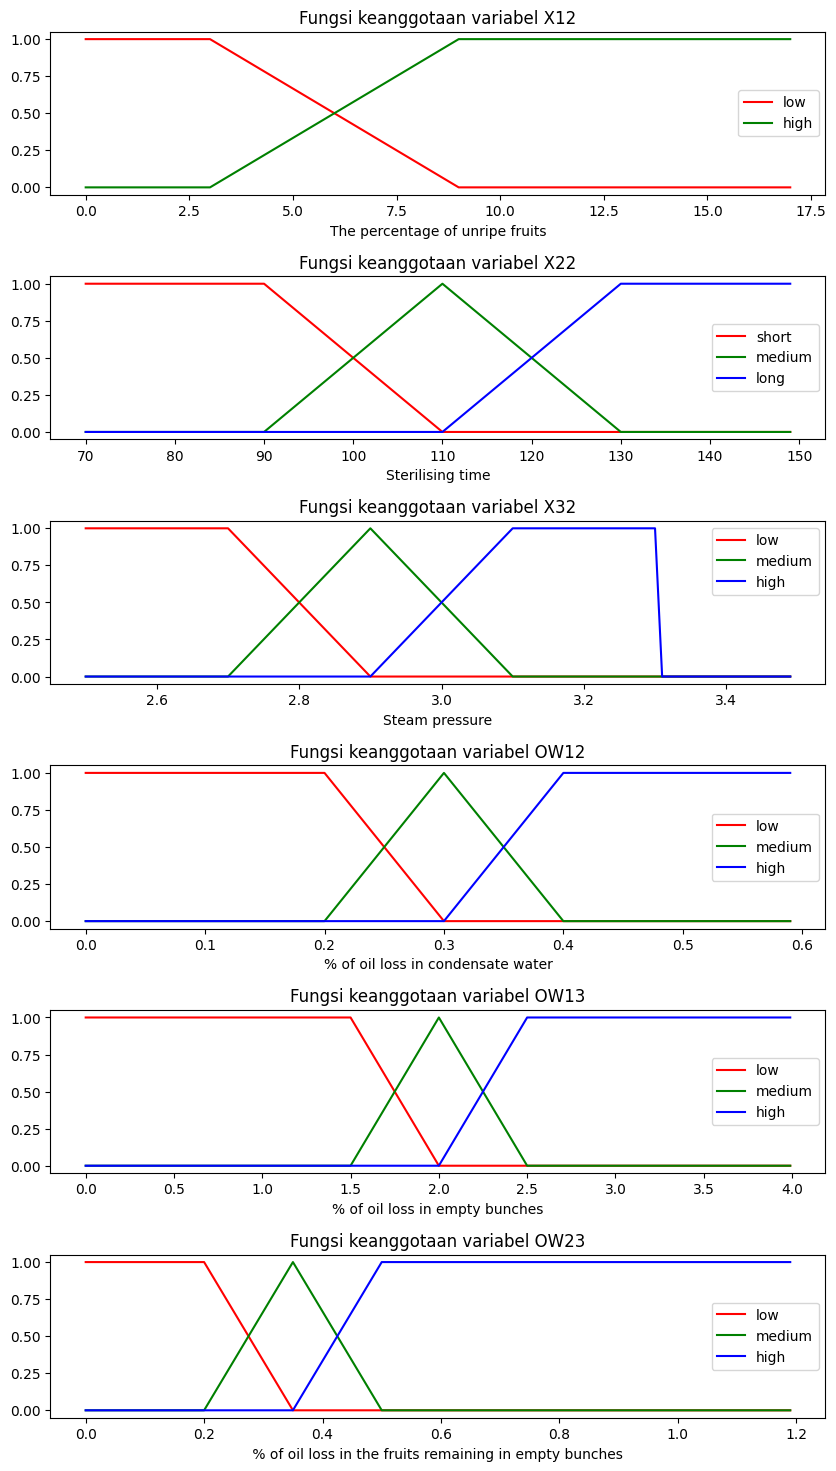

In [ ]:
# visualisasi fungsi keanggotaan
fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=6, figsize=(10, 18)) #figure dan subplot
fig.subplots_adjust(hspace=0.5) #ngatur jarak antar subplot

ax0.set_title('Fungsi keanggotaan variabel X12')
ax0.set_xlabel("The percentage of unripe fruits", fontsize=10)
ax0.plot(X12, X12_low, 'r', linewidth=1.5, label='low')
ax0.plot(X12, X12_high, 'g', linewidth=1.5, label='high')
ax0.legend()

ax1.set_title('Fungsi keanggotaan variabel X22')
ax1.set_xlabel("Sterilising time", fontsize=10)
ax1.plot(X22, X22_short, 'r', linewidth=1.5, label='short')
ax1.plot(X22, X22_medium, 'g', linewidth=1.5, label='medium')
ax1.plot(X22, X22_long, 'b', linewidth=1.5, label='long')
ax1.legend()

ax2.set_title('Fungsi keanggotaan variabel X32')
ax2.set_xlabel("Steam pressure")
ax2.plot(X32, X32_low, 'r', linewidth=1.5, label='low')
ax2.plot(X32, X32_medium, 'g', linewidth=1.5, label='medium')
ax2.plot(X32, X32_high, 'b', linewidth=1.5, label='high')
ax2.legend()

ax3.set_title('Fungsi keanggotaan variabel OW12')
ax3.set_xlabel("% of oil loss in condensate water")
ax3.plot(OW12, OW12_low, 'r', linewidth=1.5, label='low')
ax3.plot(OW12, OW12_medium, 'g', linewidth=1.5, label='medium')
ax3.plot(OW12, OW12_high, 'b', linewidth=1.5, label='high')
ax3.legend()

ax4.set_title('Fungsi keanggotaan variabel OW13')
ax4.set_xlabel("% of oil loss in empty bunches")
ax4.plot(OW13, OW13_low, 'r', linewidth=1.5, label='low')
ax4.plot(OW13, OW13_medium, 'g', linewidth=1.5, label='medium')
ax4.plot(OW13, OW13_high, 'b', linewidth=1.5, label='high')
ax4.legend()

ax5.set_title('Fungsi keanggotaan variabel OW23')
ax5.set_xlabel(" % of oil loss in the fruits remaining in empty bunches ")
ax5.plot(OW23, OW23_low, 'r', linewidth=1.5, label='low')
ax5.plot(OW23, OW23_medium, 'g', linewidth=1.5, label='medium')
ax5.plot(OW23, OW23_high, 'b', linewidth=1.5, label='high')
ax5.legend()

In [ ]:
# Fuzzifikasi input
# Fuzzifikasi variabel input X12
x1 = 6
derajat_keanggotaan_x12_low = fuzz.interp_membership(X12, X12_low, x1)
derajat_keanggotaan_x12_high = fuzz.interp_membership(X12, X12_high, x1)

variabel_fuzzy_x12 = np.array([derajat_keanggotaan_x12_low, derajat_keanggotaan_x12_high]) #sejauh mana nilai input (x1) terletak dalam himpunan fuzzy rendah (X12_low) dan tinggi (X12_high).
print('Variabel fuzzy (X12 =' , x1, ') :', variabel_fuzzy_x12)

# Fuzzifikasi variabel input X22
x2 = 110
derajat_keanggotaan_x22_short = fuzz.interp_membership(X22, X22_short, x2)
derajat_keanggotaan_x22_medium = fuzz.interp_membership(X22, X22_medium, x2)
derajat_keanggotaan_x22_long = fuzz.interp_membership(X22, X22_long, x2)

variabel_fuzzy_x22 = np.array([derajat_keanggotaan_x22_short, derajat_keanggotaan_x22_medium, derajat_keanggotaan_x22_long])
print('Variabel fuzzy (X22 =' , x2, ') :', variabel_fuzzy_x22)

# Fuzzifikasi variabel input X32
x3 = 2.9
derajat_keanggotaan_x32_low = fuzz.interp_membership(X32, X32_low, x3)
derajat_keanggotaan_x32_medium = fuzz.interp_membership(X32, X32_medium, x3)
derajat_keanggotaan_x32_high = fuzz.interp_membership(X32, X32_high, x3)

variabel_fuzzy_x32 = np.array([derajat_keanggotaan_x32_low, derajat_keanggotaan_x32_medium, derajat_keanggotaan_x32_high])
print('Variabel fuzzy (X32 =' , x3, ') :', variabel_fuzzy_x32)

Variabel fuzzy (X12 = 6 ) : [0.5 0.5]
Variabel fuzzy (X22 = 110 ) : [0. 1. 0.]
Variabel fuzzy (X32 = 2.9 ) : [4.21884749e-14 1.00000000e+00 4.21884749e-14]


In [ ]:
# rule base (hanya input)

snt_rule1 = np.fmin(np.fmin(derajat_keanggotaan_x12_high, derajat_keanggotaan_x22_long), derajat_keanggotaan_x32_high)
snt_rule2 = np.fmin(np.fmin(derajat_keanggotaan_x12_high, derajat_keanggotaan_x22_long), derajat_keanggotaan_x32_medium)
snt_rule3 = np.fmin(np.fmin(derajat_keanggotaan_x12_high, derajat_keanggotaan_x22_long), derajat_keanggotaan_x32_low)
snt_rule4 = np.fmin(np.fmin(derajat_keanggotaan_x12_high, derajat_keanggotaan_x22_medium), derajat_keanggotaan_x32_high)
snt_rule5 = np.fmin(np.fmin(derajat_keanggotaan_x12_high, derajat_keanggotaan_x22_medium), derajat_keanggotaan_x32_medium)
snt_rule6 = np.fmin(np.fmin(derajat_keanggotaan_x12_high, derajat_keanggotaan_x22_medium), derajat_keanggotaan_x32_low)
snt_rule7 = np.fmin(np.fmin(derajat_keanggotaan_x12_high, derajat_keanggotaan_x22_short), derajat_keanggotaan_x32_high)
snt_rule8 = np.fmin(np.fmin(derajat_keanggotaan_x12_high, derajat_keanggotaan_x22_short), derajat_keanggotaan_x32_medium)
snt_rule9 = np.fmin(np.fmin(derajat_keanggotaan_x12_high, derajat_keanggotaan_x22_short), derajat_keanggotaan_x32_low)
snt_rule10 = np.fmin(np.fmin(derajat_keanggotaan_x12_low, derajat_keanggotaan_x22_long), derajat_keanggotaan_x32_high)
snt_rule11 = np.fmin(np.fmin(derajat_keanggotaan_x12_low, derajat_keanggotaan_x22_long), derajat_keanggotaan_x32_medium)
snt_rule12 = np.fmin(np.fmin(derajat_keanggotaan_x12_low, derajat_keanggotaan_x22_long), derajat_keanggotaan_x32_low)
snt_rule13 = np.fmin(np.fmin(derajat_keanggotaan_x12_low, derajat_keanggotaan_x22_medium), derajat_keanggotaan_x32_high)
snt_rule14 = np.fmin(np.fmin(derajat_keanggotaan_x12_low, derajat_keanggotaan_x22_medium), derajat_keanggotaan_x32_medium)
snt_rule15 = np.fmin(np.fmin(derajat_keanggotaan_x12_low, derajat_keanggotaan_x22_medium), derajat_keanggotaan_x32_low)
snt_rule16 = np.fmin(np.fmin(derajat_keanggotaan_x12_low, derajat_keanggotaan_x22_short), derajat_keanggotaan_x32_high)
snt_rule17 = np.fmin(np.fmin(derajat_keanggotaan_x12_low, derajat_keanggotaan_x22_short), derajat_keanggotaan_x32_medium)
snt_rule18 = np.fmin(np.fmin(derajat_keanggotaan_x12_low, derajat_keanggotaan_x22_short), derajat_keanggotaan_x32_low)

In [ ]:
# rule base (dengan output)
OW12_snt_rule1 = np.fmin(snt_rule1, OW12_high)
OW13_snt_rule1 = np.fmin(snt_rule1, OW13_high)
OW23_snt_rule1 = np.fmin(snt_rule1, OW23_low)

OW12_snt_rule2 = np.fmin(snt_rule2, OW12_high)
OW13_snt_rule2 = np.fmin(snt_rule2, OW13_high)
OW23_snt_rule2 = np.fmin(snt_rule2, OW23_low)

OW12_snt_rule3 = np.fmin(snt_rule3, OW12_medium)
OW13_snt_rule3 = np.fmin(snt_rule3, OW13_medium)
OW23_snt_rule3 = np.fmin(snt_rule3, OW23_low)

OW12_snt_rule4 = np.fmin(snt_rule4, OW12_high)
OW13_snt_rule4 = np.fmin(snt_rule4, OW13_high)
OW23_snt_rule4 = np.fmin(snt_rule4, OW23_low)

OW12_snt_rule5 = np.fmin(snt_rule5, OW12_low)
OW13_snt_rule5 = np.fmin(snt_rule5, OW13_low)
OW23_snt_rule5 = np.fmin(snt_rule5, OW23_medium)

OW12_snt_rule6 = np.fmin(snt_rule6, OW12_low)
OW13_snt_rule6 = np.fmin(snt_rule6, OW13_low)
OW23_snt_rule6 = np.fmin(snt_rule6, OW23_high)

OW12_snt_rule7 = np.fmin(snt_rule7, OW12_medium)
OW13_snt_rule7 = np.fmin(snt_rule7, OW13_medium)
OW23_snt_rule7 = np.fmin(snt_rule7, OW23_high)

OW12_snt_rule8 = np.fmin(snt_rule8, OW12_low)
OW13_snt_rule8 = np.fmin(snt_rule8, OW13_low)
OW23_snt_rule8 = np.fmin(snt_rule8, OW23_high)

OW12_snt_rule9 = np.fmin(snt_rule9, OW12_low)
OW13_snt_rule9 = np.fmin(snt_rule9, OW13_low)
OW23_snt_rule9 = np.fmin(snt_rule9, OW23_high)

OW12_snt_rule10 = np.fmin(snt_rule10, OW12_high)
OW13_snt_rule10 = np.fmin(snt_rule10, OW13_high)
OW23_snt_rule10 = np.fmin(snt_rule10, OW23_low)

OW12_snt_rule11 = np.fmin(snt_rule11, OW12_high)
OW13_snt_rule11 = np.fmin(snt_rule11, OW13_high)
OW23_snt_rule11 = np.fmin(snt_rule11, OW23_low)

OW12_snt_rule12 = np.fmin(snt_rule12, OW12_medium)
OW13_snt_rule12 = np.fmin(snt_rule12, OW13_medium)
OW23_snt_rule12 = np.fmin(snt_rule12, OW23_medium)

OW12_snt_rule13 = np.fmin(snt_rule13, OW12_medium)
OW13_snt_rule13 = np.fmin(snt_rule13, OW13_medium)
OW23_snt_rule13 = np.fmin(snt_rule13, OW23_low)

OW12_snt_rule14 = np.fmin(snt_rule14, OW12_low)
OW13_snt_rule14 = np.fmin(snt_rule14, OW13_low)
OW23_snt_rule14 = np.fmin(snt_rule14, OW23_low)

OW12_snt_rule15 = np.fmin(snt_rule15, OW12_low)
OW13_snt_rule15 = np.fmin(snt_rule15, OW13_low)
OW23_snt_rule15 = np.fmin(snt_rule15, OW23_medium)

OW12_snt_rule16 = np.fmin(snt_rule16, OW12_medium)
OW13_snt_rule16 = np.fmin(snt_rule16, OW13_medium)
OW23_snt_rule16 = np.fmin(snt_rule16, OW23_medium)

OW12_snt_rule17 = np.fmin(snt_rule17, OW12_low)
OW13_snt_rule17 = np.fmin(snt_rule17, OW13_low)
OW23_snt_rule17 = np.fmin(snt_rule17, OW23_high)

OW12_snt_rule18 = np.fmin(snt_rule18, OW12_low)
OW13_snt_rule18 = np.fmin(snt_rule18, OW13_low)
OW23_snt_rule18 = np.fmin(snt_rule18, OW23_high)

In [ ]:
# Menginisialisasi array ow12_arr dengan ukuran dan tipe data yang sama dengan OW12, tetapi diisi dengan nilai nol.
ow12_arr = np.zeros_like(OW12)

# Menginisialisasi array ow13_arr dengan ukuran dan tipe data yang sama dengan OW13, tetapi diisi dengan nilai nol.
ow13_arr = np.zeros_like(OW13)

# Menginisialisasi array ow23_arr dengan ukuran dan tipe data yang sama dengan OW23, tetapi diisi dengan nilai nol.
ow23_arr = np.zeros_like(OW23)

Text(0.5, 1.0, 'Visualisasi Membership for Sterilising and Threshing')

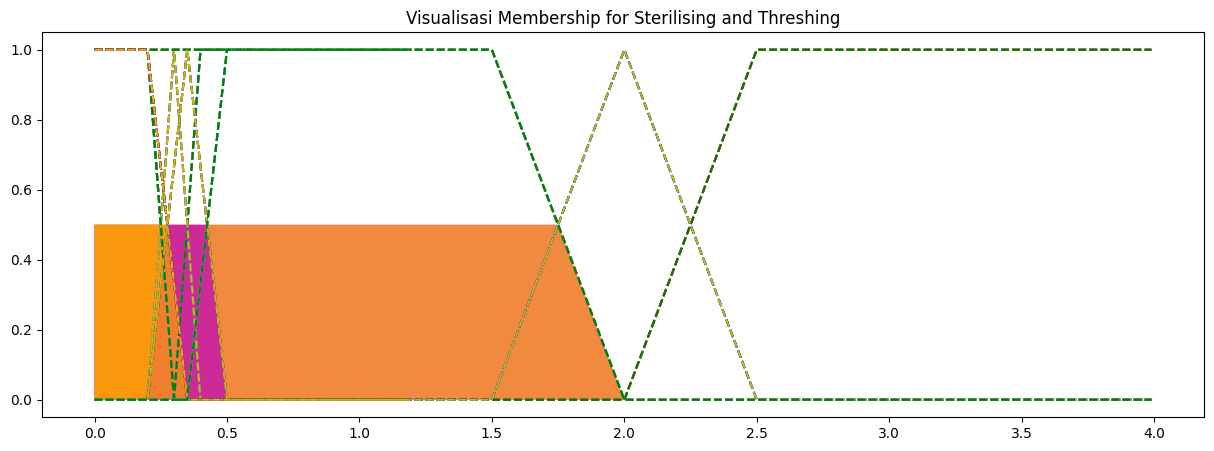

In [ ]:
# visualisasi implikasi variabel output
fig, ax = plt.subplots(figsize=(15,5))

# Menggambar area dan garis untuk OW12
ax.fill_between(OW12, ow12_arr, OW12_snt_rule1, facecolor='b', alpha=0.7)
ax.plot(OW12, OW12_high, 'b', linewidth=1.5, linestyle='--')
ax.fill_between(OW12, ow12_arr, OW12_snt_rule2, facecolor='Orange', alpha=0.7)
ax.plot(OW12, OW12_high, 'Orange', linewidth=1.5, linestyle='--')
ax.fill_between(OW12, ow12_arr, OW12_snt_rule3, facecolor='r', alpha=0.7)
ax.plot(OW12, OW12_medium, 'r', linewidth=1.5, linestyle='--')
ax.fill_between(OW12, ow12_arr, OW12_snt_rule4, facecolor='c', alpha=0.7)
ax.plot(OW12, OW12_high, 'c', linewidth=1.5, linestyle='--')
ax.fill_between(OW12, ow12_arr, OW12_snt_rule5, facecolor='m', alpha=0.7)
ax.plot(OW12, OW12_low, 'm', linewidth=1.5, linestyle='--')
ax.fill_between(OW12, ow12_arr, OW12_snt_rule6, facecolor='y', alpha=0.7)
ax.plot(OW12, OW12_low, 'y', linewidth=1.5, linestyle='--')
ax.fill_between(OW12, ow12_arr, OW12_snt_rule7, facecolor='aquamarine', alpha=0.7)
ax.plot(OW12, OW12_medium, 'aquamarine', linewidth=1.5, linestyle='--')
ax.fill_between(OW12, ow12_arr, OW12_snt_rule8, facecolor='olive', alpha=0.7)
ax.plot(OW12, OW12_low, 'olive', linewidth=1.5, linestyle='--')
ax.fill_between(OW12, ow12_arr, OW12_snt_rule9, facecolor='tab:brown', alpha=0.7)
ax.plot(OW12, OW12_low, 'tab:brown', linewidth=1.5, linestyle='--')
ax.fill_between(OW12, ow12_arr, OW12_snt_rule10, facecolor='tab:purple', alpha=0.7)
ax.plot(OW12, OW12_high, 'tab:purple', linewidth=1.5, linestyle='--')
ax.fill_between(OW12, ow12_arr, OW12_snt_rule11, facecolor='g', alpha=0.7)
ax.plot(OW12, OW12_high, 'g', linewidth=1.5, linestyle='--')
ax.fill_between(OW12, ow12_arr, OW12_snt_rule12, facecolor='pink', alpha=0.7)
ax.plot(OW12, OW12_medium, 'pink', linewidth=1.5, linestyle='--')
ax.fill_between(OW12, ow12_arr, OW12_snt_rule13, facecolor='b', alpha=0.7)
ax.plot(OW12, OW12_medium, 'b', linewidth=1.5, linestyle='--')
ax.fill_between(OW12, ow12_arr, OW12_snt_rule14, facecolor='orange', alpha=0.7)
ax.plot(OW12, OW12_low, 'orange', linewidth=1.5, linestyle='--')
ax.fill_between(OW12, ow12_arr, OW12_snt_rule15, facecolor='tab:purple', alpha=0.7)
ax.plot(OW12, OW12_low, 'tab:purple', linewidth=1.5, linestyle='--')
ax.fill_between(OW12, ow12_arr, OW12_snt_rule16, facecolor='y', alpha=0.7)
ax.plot(OW12, OW12_medium, 'y', linewidth=1.5, linestyle='--')
ax.fill_between(OW12, ow12_arr, OW12_snt_rule17, facecolor='c', alpha=0.7)
ax.plot(OW12, OW12_low, 'c', linewidth=1.5, linestyle='--')
ax.fill_between(OW12, ow12_arr, OW12_snt_rule18, facecolor='g', alpha=0.7)
ax.plot(OW12, OW12_low, 'g', linewidth=1.5, linestyle='--')

# Menggambar area dan garis untuk OW13
ax.fill_between(OW13, ow13_arr, OW13_snt_rule1, facecolor='b', alpha=0.7)
ax.plot(OW13, OW13_high, 'b', linewidth=1.5, linestyle='--')
ax.fill_between(OW13, ow13_arr, OW13_snt_rule2, facecolor='Orange', alpha=0.7)
ax.plot(OW13, OW13_high, 'Orange', linewidth=1.5, linestyle='--')
ax.fill_between(OW13, ow13_arr, OW13_snt_rule3, facecolor='c', alpha=0.7)
ax.plot(OW13, OW13_medium, 'c', linewidth=1.5, linestyle='--')
ax.fill_between(OW13, ow13_arr, OW13_snt_rule4, facecolor='r', alpha=0.7)
ax.plot(OW13, OW13_high, 'r', linewidth=1.5, linestyle='--')
ax.fill_between(OW13, ow13_arr, OW13_snt_rule5, facecolor='m', alpha=0.7)
ax.plot(OW13, OW13_low, 'm', linewidth=1.5, linestyle='--')
ax.fill_between(OW13, ow13_arr, OW13_snt_rule6, facecolor='y', alpha=0.7)
ax.plot(OW13, OW13_low, 'y', linewidth=1.5, linestyle='--')
ax.fill_between(OW13, ow13_arr, OW13_snt_rule7, facecolor='aquamarine', alpha=0.7)
ax.plot(OW13, OW13_medium, 'aquamarine', linewidth=1.5, linestyle='--')
ax.fill_between(OW13, ow13_arr, OW13_snt_rule8, facecolor='olive', alpha=0.7)
ax.plot(OW13, OW13_low, 'olive', linewidth=1.5, linestyle='--')
ax.fill_between(OW13, ow13_arr, OW13_snt_rule9, facecolor='tab:purple', alpha=0.7)
ax.plot(OW13, OW13_low, 'tab:purple', linewidth=1.5, linestyle='--')
ax.fill_between(OW13, ow13_arr, OW13_snt_rule10, facecolor='tab:brown', alpha=0.7)
ax.plot(OW13, OW13_high, 'tab:brown', linewidth=1.5, linestyle='--')
ax.fill_between(OW13, ow13_arr, OW13_snt_rule11, facecolor='g', alpha=0.7)
ax.plot(OW13, OW13_high, 'g', linewidth=1.5, linestyle='--')
ax.fill_between(OW13, ow13_arr, OW13_snt_rule12, facecolor='blue', alpha=0.7)
ax.plot(OW13, OW13_medium, 'blue', linewidth=1.5, linestyle='--')
ax.fill_between(OW13, ow13_arr, OW13_snt_rule13, facecolor='b', alpha=0.7)
ax.plot(OW13, OW13_medium, 'b', linewidth=1.5, linestyle='--')
ax.fill_between(OW13, ow13_arr, OW13_snt_rule14, facecolor='orange', alpha=0.7)
ax.plot(OW13, OW13_low, 'orange', linewidth=1.5, linestyle='--')
ax.fill_between(OW13, ow13_arr, OW13_snt_rule15, facecolor='tab:brown', alpha=0.7)
ax.plot(OW13, OW13_low, 'tab:brown', linewidth=1.5, linestyle='--')
ax.fill_between(OW13, ow13_arr, OW13_snt_rule16, facecolor='y', alpha=0.7)
ax.plot(OW13, OW13_medium, 'y', linewidth=1.5, linestyle='--')
ax.fill_between(OW13, ow13_arr, OW13_snt_rule17, facecolor='c', alpha=0.7)
ax.plot(OW13, OW13_low, 'c', linewidth=1.5, linestyle='--')
ax.fill_between(OW13, ow13_arr, OW13_snt_rule18, facecolor='g', alpha=0.7)
ax.plot(OW13, OW13_low, 'g', linewidth=1.5, linestyle='--')

# Menggambar area dan garis untuk OW23
ax.fill_between(OW23, ow23_arr, OW23_snt_rule1, facecolor='b', alpha=0.7)
ax.plot(OW23, OW23_low, 'b', linewidth=1.5, linestyle='--')
ax.fill_between(OW23, ow23_arr, OW23_snt_rule2, facecolor='Orange', alpha=0.7)
ax.plot(OW23, OW23_low, 'Orange', linewidth=1.5, linestyle='--')
ax.fill_between(OW23, ow23_arr, OW23_snt_rule3, facecolor='c', alpha=0.7)
ax.plot(OW23, OW23_low, 'c', linewidth=1.5, linestyle='--')
ax.fill_between(OW23, ow23_arr, OW23_snt_rule4, facecolor='r', alpha=0.7)
ax.plot(OW23, OW23_low, 'r', linewidth=1.5, linestyle='--')
ax.fill_between(OW23, ow23_arr, OW23_snt_rule5, facecolor='m', alpha=0.7)
ax.plot(OW23, OW23_medium, 'm', linewidth=1.5, linestyle='--')
ax.fill_between(OW23, ow23_arr, OW23_snt_rule6, facecolor='y', alpha=0.7)
ax.plot(OW23, OW23_high, 'y', linewidth=1.5, linestyle='--')
ax.fill_between(OW23, ow23_arr, OW23_snt_rule7, facecolor='aquamarine', alpha=0.7)
ax.plot(OW23, OW23_high, 'aquamarine', linewidth=1.5, linestyle='--')
ax.fill_between(OW23, ow23_arr, OW23_snt_rule8, facecolor='olive', alpha=0.7)
ax.plot(OW23, OW23_high, 'olive', linewidth=1.5, linestyle='--')
ax.fill_between(OW23, ow23_arr, OW23_snt_rule9, facecolor='tab:purple', alpha=0.7)
ax.plot(OW23, OW23_high, 'tab:purple', linewidth=1.5, linestyle='--')
ax.fill_between(OW23, ow23_arr, OW23_snt_rule10, facecolor='tab:brown', alpha=0.7)
ax.plot(OW23, OW23_low, 'tab:brown', linewidth=1.5, linestyle='--')
ax.fill_between(OW23, ow23_arr, OW23_snt_rule11, facecolor='g', alpha=0.7)
ax.plot(OW23, OW23_low, 'g', linewidth=1.5, linestyle='--')
ax.fill_between(OW23, ow23_arr, OW23_snt_rule12, facecolor='blue', alpha=0.7)
ax.plot(OW23, OW23_medium, 'blue', linewidth=1.5, linestyle='--')
ax.fill_between(OW23, ow23_arr, OW23_snt_rule13, facecolor='b', alpha=0.7)
ax.plot(OW23, OW23_low, 'b', linewidth=1.5, linestyle='--')
ax.fill_between(OW23, ow23_arr, OW23_snt_rule14, facecolor='orange', alpha=0.7)
ax.plot(OW23, OW23_low, 'orange', linewidth=1.5, linestyle='--')
ax.fill_between(OW23, ow23_arr, OW23_snt_rule15, facecolor='tab:brown', alpha=0.7)
ax.plot(OW23, OW23_medium, 'tab:brown', linewidth=1.5, linestyle='--')
ax.fill_between(OW23, ow23_arr, OW23_snt_rule16, facecolor='y', alpha=0.7)
ax.plot(OW23, OW23_medium, 'y', linewidth=1.5, linestyle='--')
ax.fill_between(OW23, ow23_arr, OW23_snt_rule17, facecolor='c', alpha=0.7)
ax.plot(OW23, OW23_high, 'c', linewidth=1.5, linestyle='--')
ax.fill_between(OW23, ow23_arr, OW23_snt_rule18, facecolor='g', alpha=0.7)
ax.plot(OW23, OW23_high, 'g', linewidth=1.5, linestyle='--')
ax.set_title('Visualisasi Membership for Sterilising and Threshing')

In [ ]:
# Agregasi
aggregated_OW12 = np.fmax(OW12_snt_rule1, np.fmax(OW12_snt_rule2, np.fmax(OW12_snt_rule3, np.fmax(OW12_snt_rule4, np.fmax(OW12_snt_rule5, np.fmax(OW12_snt_rule6, np.fmax(OW12_snt_rule7, np.fmax(OW12_snt_rule8, np.fmax(OW12_snt_rule9, np.fmax(OW12_snt_rule10, np.fmax(OW12_snt_rule11, np.fmax(OW12_snt_rule12, np.fmax(OW12_snt_rule13, np.fmax(OW12_snt_rule14, np.fmax(OW12_snt_rule15, np.fmax(OW12_snt_rule16, np.fmax(OW12_snt_rule17, OW12_snt_rule18)))))))))))))))))
aggregated_OW13 = np.fmax(OW13_snt_rule1, np.fmax(OW13_snt_rule2, np.fmax(OW13_snt_rule3, np.fmax(OW13_snt_rule4, np.fmax(OW13_snt_rule5, np.fmax(OW13_snt_rule6, np.fmax(OW13_snt_rule7, np.fmax(OW13_snt_rule8, np.fmax(OW13_snt_rule9, np.fmax(OW13_snt_rule10, np.fmax(OW13_snt_rule11, np.fmax(OW13_snt_rule12, np.fmax(OW13_snt_rule13, np.fmax(OW13_snt_rule14, np.fmax(OW13_snt_rule15, np.fmax(OW13_snt_rule16, np.fmax(OW13_snt_rule17, OW13_snt_rule18)))))))))))))))))
aggregated_OW23 = np.fmax(OW23_snt_rule1, np.fmax(OW23_snt_rule2, np.fmax(OW23_snt_rule3, np.fmax(OW23_snt_rule4, np.fmax(OW23_snt_rule5, np.fmax(OW23_snt_rule6, np.fmax(OW23_snt_rule7, np.fmax(OW23_snt_rule8, np.fmax(OW23_snt_rule9, np.fmax(OW23_snt_rule10, np.fmax(OW23_snt_rule11, np.fmax(OW23_snt_rule12, np.fmax(OW23_snt_rule13, np.fmax(OW23_snt_rule14, np.fmax(OW23_snt_rule15, np.fmax(OW23_snt_rule16, np.fmax(OW23_snt_rule17, OW23_snt_rule18)))))))))))))))))

In [ ]:
# Defuzzifikasi
# Defuzifikasi untuk OW12
ow12_defuzz = fuzz.defuzz(OW12, aggregated_OW12, 'centroid')
ow12_activation = fuzz.interp_membership(OW12, aggregated_OW12, ow12_defuzz)
print('GOG of OW12:', ow12_defuzz)
print('OW12 degree of membership:', ow12_activation, '\n')

# Defuzifikasi untuk OW13
ow13_defuzz = fuzz.defuzz(OW13, aggregated_OW13, 'centroid')
ow13_activation = fuzz.interp_membership(OW13, aggregated_OW13, ow13_defuzz)
print('GOG of OW13:', ow13_defuzz)
print('OW13 degree of membership:', ow13_activation, '\n')

# Defuzifikasi untuk OW23
ow23_defuzz = fuzz.defuzz(OW23, aggregated_OW23, 'centroid')
ow23_activation = fuzz.interp_membership(OW23, aggregated_OW23, ow23_defuzz)
print('GOG of OW23:', ow23_defuzz)
print('OW23 degree of membership:', ow23_activation, '\n')

GOG of OW12: 0.13787878787881555
OW12 degree of membership: 0.5 

GOG of OW13: 0.9388888888890687
OW13 degree of membership: 0.5 

GOG of OW23: 0.23168709444852778
OW23 degree of membership: 0.5 



Text(0.5, 1.0, 'Defuzzifikasi OW23 dengan Metode Mamdani: Centroid')

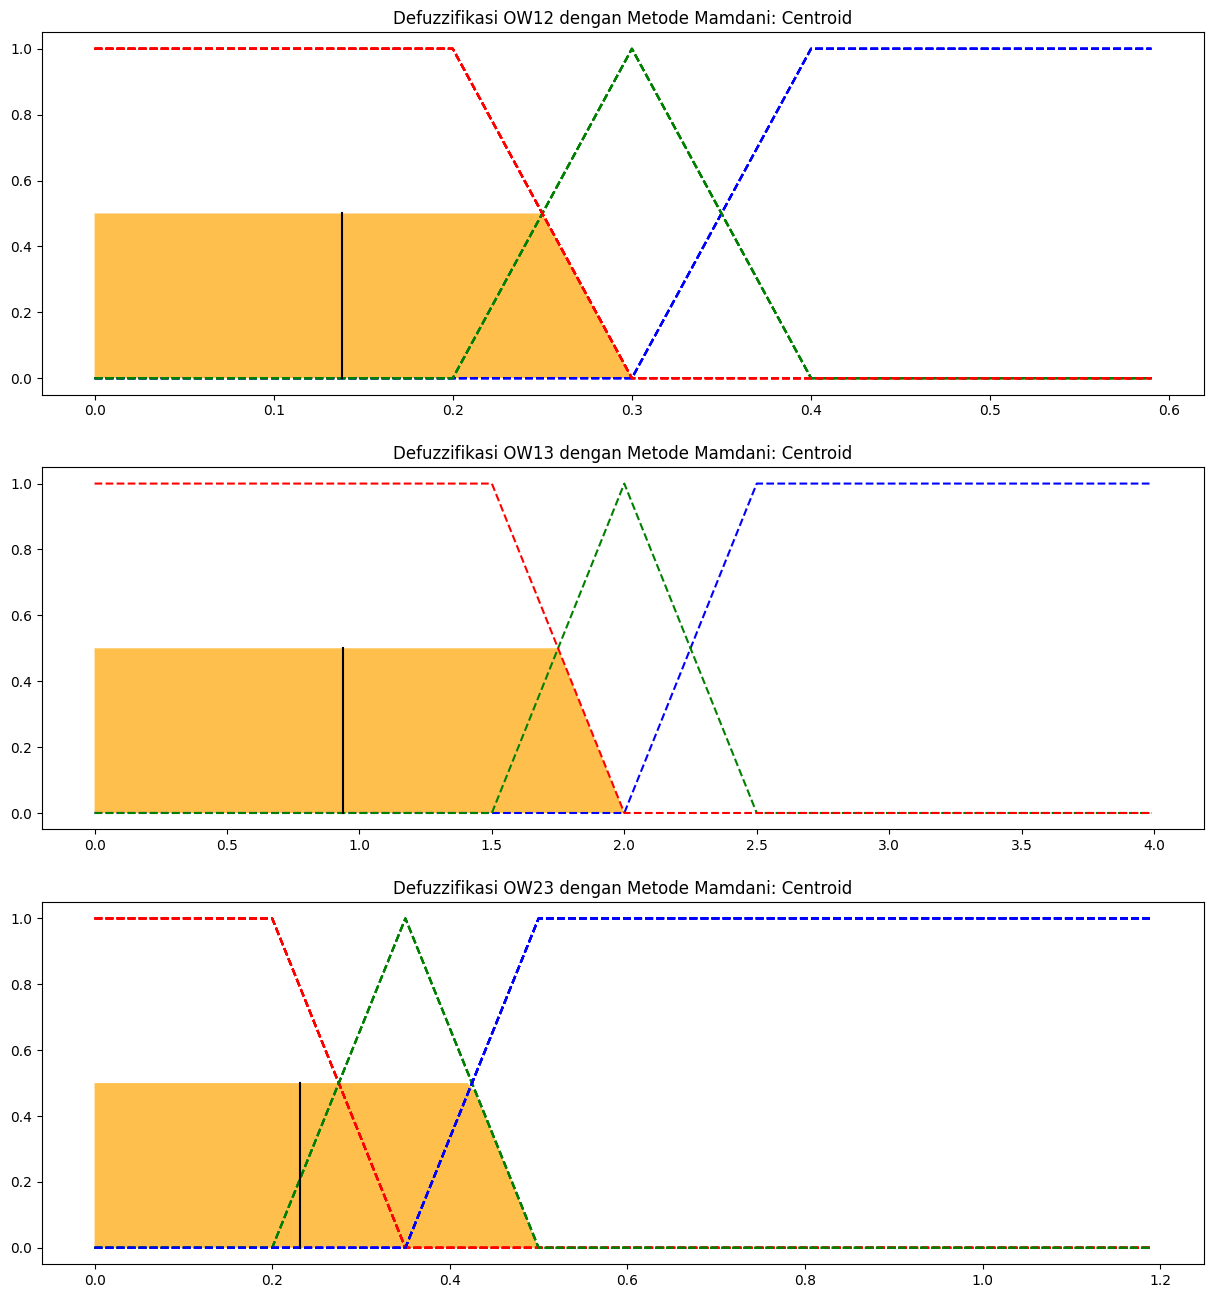

In [ ]:
# visualisasi defuzzifikasi
# visualisasi defuzzifikasi untuk OW12
fig, (dx0, dx1, dx2) = plt.subplots(nrows = 3, figsize=(15,16))

# Plot fungsi keanggotaan untuk OW12
dx0.plot(OW12, OW12_high, 'b', linewidth=1.5, linestyle='--')
dx0.plot(OW12, OW12_high, 'b', linewidth=1.5, linestyle='--')
dx0.plot(OW12, OW12_medium, 'g', linewidth=1.5, linestyle='--')
dx0.plot(OW12, OW12_high, 'b', linewidth=1.5, linestyle='--')
dx0.plot(OW12, OW12_low, 'r', linewidth=1.5, linestyle='--')
dx0.plot(OW12, OW12_low, 'r', linewidth=1.5, linestyle='--')
dx0.plot(OW12, OW12_medium, 'g', linewidth=1.5, linestyle='--')
dx0.plot(OW12, OW12_low, 'r', linewidth=1.5, linestyle='--')
dx0.plot(OW12, OW12_low, 'r', linewidth=1.5, linestyle='--')
dx0.plot(OW12, OW12_high, 'b', linewidth=1.5, linestyle='--')
dx0.plot(OW12, OW12_high, 'b', linewidth=1.5, linestyle='--')
dx0.plot(OW12, OW12_medium, 'g', linewidth=1.5, linestyle='--')
dx0.plot(OW12, OW12_medium, 'g', linewidth=1.5, linestyle='--')
dx0.plot(OW12, OW12_low, 'r', linewidth=1.5, linestyle='--')
dx0.plot(OW12, OW12_low, 'r', linewidth=1.5, linestyle='--')
dx0.plot(OW12, OW12_medium, 'g', linewidth=1.5, linestyle='--')
dx0.plot(OW12, OW12_low, 'r', linewidth=1.5, linestyle='--')
dx0.plot(OW12, OW12_low, 'r', linewidth=1.5, linestyle='--')
# Mengisi area di bawah kurva agregasi dengan warna Orange untuk OW12
dx0.fill_between(OW12, ow12_arr, aggregated_OW12, facecolor='Orange', alpha=0.7)
dx0.plot([ow12_defuzz, ow12_defuzz], [0, ow12_activation], 'black')
dx0.set_title('Defuzzifikasi OW12 dengan Metode Mamdani: Centroid')

# Plot fungsi keanggotaan untuk OW13
dx1.plot(OW13, OW13_high, 'b', linewidth=1.5, linestyle='--')
dx1.plot(OW13, OW13_medium, 'g', linewidth=1.5, linestyle='--')
dx1.plot(OW13, OW13_low, 'r', linewidth=1.5, linestyle='--')
# Mengisi area di bawah kurva agregasi dengan warna Orange untuk OW13
dx1.fill_between(OW13, ow13_arr, aggregated_OW13, facecolor='Orange', alpha=0.7)
dx1.plot([ow13_defuzz, ow13_defuzz], [0, ow13_activation], 'black')
dx1.set_title('Defuzzifikasi OW13 dengan Metode Mamdani: Centroid')

# Plot fungsi keanggotaan untuk OW23
dx2.plot(OW23, OW23_low, 'r', linewidth=1.5, linestyle='--')
dx2.plot(OW23, OW23_low, 'r', linewidth=1.5, linestyle='--')
dx2.plot(OW23, OW23_high, 'b', linewidth=1.5, linestyle='--')
dx2.plot(OW23, OW23_low, 'r', linewidth=1.5, linestyle='--')
dx2.plot(OW23, OW23_medium, 'g', linewidth=1.5, linestyle='--')
dx2.plot(OW23, OW23_high, 'b', linewidth=1.5, linestyle='--')
dx2.plot(OW23, OW23_high, 'b', linewidth=1.5, linestyle='--')
dx2.plot(OW23, OW23_high, 'b', linewidth=1.5, linestyle='--')
dx2.plot(OW23, OW23_high, 'b', linewidth=1.5, linestyle='--')
dx2.plot(OW23, OW23_low, 'r', linewidth=1.5, linestyle='--')
dx2.plot(OW23, OW23_low, 'r', linewidth=1.5, linestyle='--')
dx2.plot(OW23, OW23_medium, 'g', linewidth=1.5, linestyle='--')
dx2.plot(OW23, OW23_low, 'r', linewidth=1.5, linestyle='--')
dx2.plot(OW23, OW23_low, 'r', linewidth=1.5, linestyle='--')
dx2.plot(OW23, OW23_medium, 'g', linewidth=1.5, linestyle='--')
dx2.plot(OW23, OW23_medium, 'g', linewidth=1.5, linestyle='--')
dx2.plot(OW23, OW23_high, 'b', linewidth=1.5, linestyle='--')
dx2.plot(OW23, OW23_high, 'b', linewidth=1.5, linestyle='--')
# Mengisi area di bawah kurva agregasi dengan warna Orange untuk OW23
dx2.fill_between(OW23, ow23_arr, aggregated_OW23, facecolor='Orange', alpha=0.7)
dx2.plot([ow23_defuzz, ow23_defuzz], [0, ow23_activation], 'black')
dx2.set_title('Defuzzifikasi OW23 dengan Metode Mamdani: Centroid')

# Digesting and Press

Inisialisasi

In [ ]:
#Inisialisasi

#input
X14 = np.arange(0, 40, 5) #digesting timeny range 0 - 40,
X24 = np.arange(70, 110, 5)
X34 = np.arange(20, 60, 5)

#output
OW14 = np.arange(0, 8, 0.5)
KW14 = np.arange(0, 4, 0.25)

In [ ]:
#Generate fuzzy membership functions

#input
X14_short = fuzz.trapmf(X14,[0, 0, 15, 20])
X14_medium = fuzz.trapmf(X14, [15, 20, 25, 30])
X14_long = fuzz.trapmf(X14, [25, 30, 40, 40])

X24_low = fuzz.trapmf(X24, [70, 70, 80, 90])
X24_medium = fuzz.trimf(X24, [80, 90, 100])
X24_high = fuzz.trapmf(X24, [90, 100, 110, 110])

X34_low = fuzz.trapmf(X34, [20, 20, 30, 35])
X34_medium = fuzz.trapmf(X34, [30, 35, 40, 45])
X34_high = fuzz.trapmf(X34, [40, 45, 60, 60])

#output
OW14_low = fuzz.trapmf(OW14, [0, 0, 3, 4])
OW14_medium = fuzz.trimf(OW14, [3, 4, 5])
OW14_high = fuzz.trapmf(OW14, [4, 5, 8, 8])

KW14_low = fuzz.trapmf(KW14, [0, 0, 1.75, 2])
KW14_medium = fuzz.trimf(KW14, [1.75, 2, 2.25])
KW14_high = fuzz.trapmf(KW14, [2, 2.25, 4, 4])

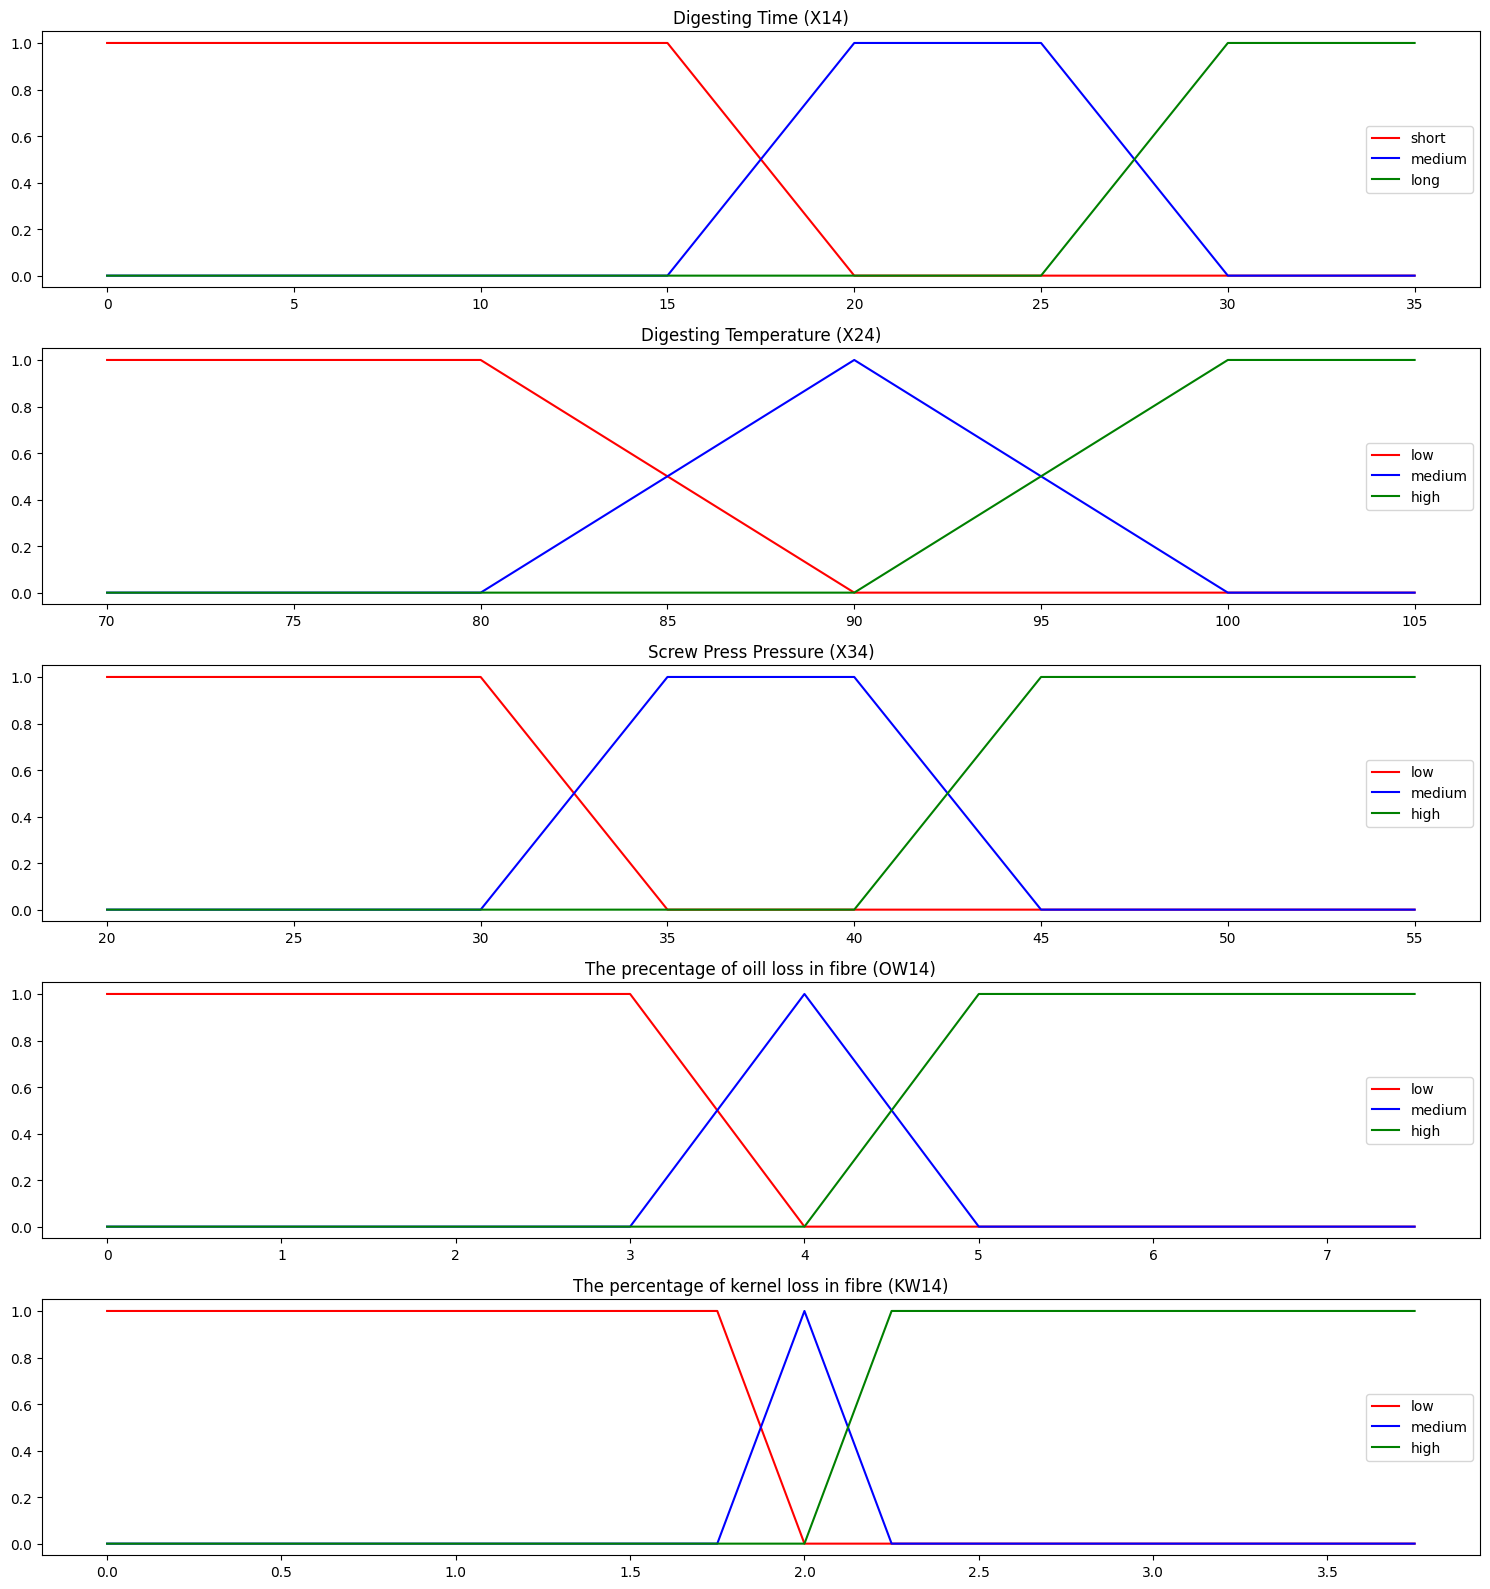

In [ ]:
#Visualize these universes and membership functions

fig, (x14, x24, x34, ow14, kw14) = plt.subplots(nrows=5, figsize=(15, 16))

x14.plot(X14, X14_short, 'r', linewidth=1.5, label='short')
x14.plot(X14, X14_medium, 'b', linewidth=1.5, label='medium')
x14.plot(X14, X14_long, 'g', linewidth=1.5, label='long')
x14.set_title('Digesting Time (X14)')
x14.legend()

x24.plot(X24, X24_low, 'r', linewidth=1.5, label='low')
x24.plot(X24, X24_medium, 'b', linewidth=1.5, label='medium')
x24.plot(X24, X24_high, 'g', linewidth=1.5, label='high')
x24.set_title('Digesting Temperature (X24)')
x24.legend()

x34.plot(X34, X34_low, 'r', linewidth=1.5, label='low')
x34.plot(X34, X34_medium, 'b', linewidth=1.5, label='medium')
x34.plot(X34, X34_high, 'g', linewidth=1.5, label='high')
x34.set_title('Screw Press Pressure (X34)')
x34.legend()

ow14.plot(OW14, OW14_low, 'r', linewidth=1.5, label='low')
ow14.plot(OW14, OW14_medium, 'b', linewidth=1.5, label='medium')
ow14.plot(OW14, OW14_high, 'g', linewidth=1.5, label='high')
ow14.set_title('The precentage of oill loss in fibre (OW14)')
ow14.legend()

kw14.plot(KW14, KW14_low, 'r', linewidth=1.5, label='low')
kw14.plot(KW14, KW14_medium, 'b', linewidth=1.5, label='medium')
kw14.plot(KW14, KW14_high, 'g', linewidth=1.5, label='high')
kw14.set_title('The percentage of kernel loss in fibre (KW14)')
kw14.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Fuzzifikasi
#Activation our fuzzy membership function to the exact values
#The exact values 20, 95, 40, do not exist in our universes...
#This is what fuzz.interp_membership exist for

#fuzzifikasi variabel input X14
x14 = 25
x14_level_short = fuzz.interp_membership(X14, X14_short, x14)
x14_level_medium = fuzz.interp_membership(X14, X14_medium, x14)
x14_level_long = fuzz.interp_membership(X14, X14_long, x14)
x14_fuzz_var = np.array([x14_level_short, x14_level_medium, x14_level_long])
print('Fuzzy Variable(X14 =' , x14, ') :', x14_fuzz_var)


#fuzzifikasi variabel input x24
x24 = 80
x24_level_low = fuzz.interp_membership(X24, X24_low, x24)
x24_level_medium = fuzz.interp_membership(X24, X24_medium, x24)
x24_level_high = fuzz.interp_membership(X24, X24_high, x24)
x24_fuzz_var = np.array([x24_level_low, x24_level_medium, x24_level_high])
print('Fuzzy Variable(X24 =' , x24, ') :', x24_fuzz_var)


#fuzzifikasi variabel input x34
x34 = 40
x34_level_low = fuzz.interp_membership(X34, X34_low, x34)
x34_level_medium = fuzz.interp_membership(X34, X34_medium, x34)
x34_level_high = fuzz.interp_membership(X34, X34_high, x34)
x34_fuzz_var = np.array([x34_level_low, x34_level_medium, x34_level_high])
print('Fuzzy Variable(X34 =' , x34, ') :', x34_fuzz_var)

Fuzzy Variable(X14 = 25 ) : [0. 1. 0.]
Fuzzy Variable(X24 = 80 ) : [1. 0. 0.]
Fuzzy Variable(X34 = 40 ) : [0. 1. 0.]


In [ ]:
#take our rules and apply them
#use np.fmin for connect the first variable AND the second variable
#the AND variable means we take the minimum of these two

#rule based
active_rule1 = np.fmin(x14_level_long, np.fmin(x24_level_high, x34_level_high))
active_rule2 = np.fmin(x14_level_long, np.fmin(x24_level_medium, x34_level_high))
active_rule3 = np.fmin(x14_level_long, np.fmin(x24_level_low, x34_level_high))
active_rule4 = np.fmin(x14_level_long, np.fmin(x24_level_high, x34_level_medium))
active_rule5 = np.fmin(x14_level_long, np.fmin(x24_level_medium, x34_level_medium))
active_rule6 = np.fmin(x14_level_long, np.fmin(x24_level_low, x34_level_medium))
active_rule7 = np.fmin(x14_level_long, np.fmin(x24_level_high, x34_level_low))
active_rule8 = np.fmin(x14_level_long, np.fmin(x24_level_medium, x34_level_low))
active_rule9 = np.fmin(x14_level_long, np.fmin(x24_level_low, x34_level_low))
active_rule10 = np.fmin(x14_level_medium, np.fmin(x24_level_high, x34_level_high))
active_rule11 = np.fmin(x14_level_medium, np.fmin(x24_level_medium, x34_level_high))
active_rule12 = np.fmin(x14_level_medium, np.fmin(x24_level_low, x34_level_high))
active_rule13 = np.fmin(x14_level_medium, np.fmin(x24_level_high, x34_level_medium))
active_rule14 = np.fmin(x14_level_medium, np.fmin(x24_level_medium, x34_level_medium))
active_rule15 = np.fmin(x14_level_medium, np.fmin(x24_level_low, x34_level_medium))
active_rule16 = np.fmin(x14_level_medium, np.fmin(x24_level_high, x34_level_low))
active_rule17 = np.fmin(x14_level_medium, np.fmin(x24_level_medium, x34_level_low))
active_rule18 = np.fmin(x14_level_medium, np.fmin(x24_level_low, x34_level_low))
active_rule19 = np.fmin(x14_level_short, np.fmin(x24_level_high, x34_level_high))
active_rule20 = np.fmin(x14_level_short, np.fmin(x24_level_medium, x34_level_high))
active_rule21 = np.fmin(x14_level_short, np.fmin(x24_level_low, x34_level_high))
active_rule22 = np.fmin(x14_level_short, np.fmin(x24_level_high, x34_level_medium))
active_rule23 = np.fmin(x14_level_short, np.fmin(x24_level_medium, x34_level_medium))
active_rule24 = np.fmin(x14_level_short, np.fmin(x24_level_low, x34_level_medium))
active_rule25 = np.fmin(x14_level_short, np.fmin(x24_level_high, x34_level_low))
active_rule26 = np.fmin(x14_level_short, np.fmin(x24_level_medium, x34_level_low))
active_rule27 = np.fmin(x14_level_short, np.fmin(x24_level_low, x34_level_low))

In [ ]:
#rule based
rule1 = np.fmin(active_rule1, np.fmin(OW14_low, KW14_high))
rule2 = np.fmin(active_rule2, np.fmin(OW14_low, KW14_high))
rule3 = np.fmin(active_rule3, np.fmin(OW14_medium, KW14_high))
rule4 = np.fmin(active_rule4, np.fmin(OW14_medium, KW14_medium))
rule5 = np.fmin(active_rule5, np.fmin(OW14_medium, KW14_medium))
rule6 = np.fmin(active_rule6, np.fmin(OW14_high, KW14_medium))
rule7 = np.fmin(active_rule7, np.fmin(OW14_high, KW14_low))
rule8 = np.fmin(active_rule8, np.fmin(OW14_high, KW14_low))
rule9 = np.fmin(active_rule9, np.fmin(OW14_high, KW14_low))
rule10 = np.fmin(active_rule10, np.fmin(OW14_low, KW14_high))
rule11 = np.fmin(active_rule11, np.fmin(OW14_low, KW14_high))
rule12 = np.fmin(active_rule12, np.fmin(OW14_medium, KW14_high))
rule13 = np.fmin(active_rule13, np.fmin(OW14_medium, KW14_medium))
rule14 = np.fmin(active_rule14, np.fmin(OW14_medium, KW14_medium))
rule15 = np.fmin(active_rule15, np.fmin(OW14_high, KW14_high))
rule16 = np.fmin(active_rule16, np.fmin(OW14_high, KW14_low))
rule17 = np.fmin(active_rule17, np.fmin(OW14_high, KW14_low))
rule18 = np.fmin(active_rule18, np.fmin(OW14_high, KW14_medium))
rule19 = np.fmin(active_rule19, np.fmin(OW14_medium, KW14_high))
rule20 = np.fmin(active_rule20, np.fmin(OW14_medium, KW14_high))
rule21 = np.fmin(active_rule21, np.fmin(OW14_medium, KW14_high))
rule22 = np.fmin(active_rule22, np.fmin(OW14_high, KW14_medium))
rule23 = np.fmin(active_rule23, np.fmin(OW14_high, KW14_high))
rule24 = np.fmin(active_rule24, np.fmin(OW14_high, KW14_high))
rule25 = np.fmin(active_rule25, np.fmin(OW14_high, KW14_medium))
rule26 = np.fmin(active_rule26, np.fmin(OW14_high, KW14_medium))
rule27 = np.fmin(active_rule27, np.fmin(OW14_high, KW14_medium))

In [ ]:
ow14_arr = np.zeros_like(OW14)
kw14_arr = np.zeros_like(KW14)

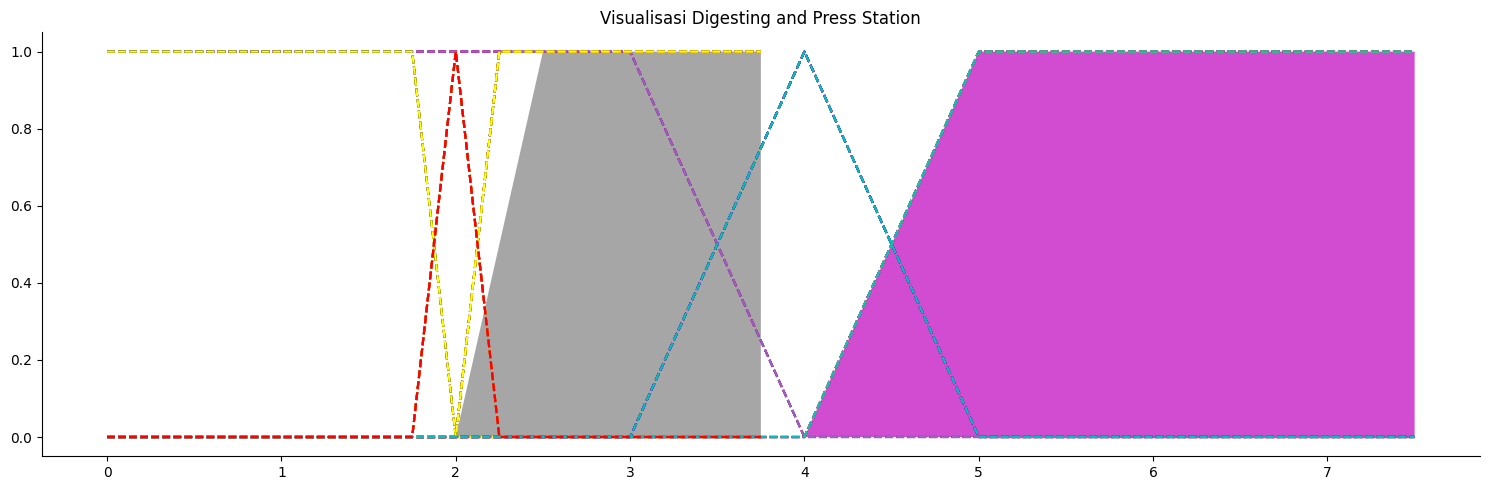

In [ ]:
#visualisasi

fig, ax = plt.subplots(figsize=(15,5))

#1
ax.fill_between(OW14, ow14_arr, rule1, facecolor='b', alpha=0.7)
ax.plot(OW14, OW14_low, 'b', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule1, facecolor='b', alpha=0.7)
ax.plot(KW14, KW14_high, 'b', linewidth=1.5, linestyle='--')

#2
ax.fill_between(OW14, ow14_arr, rule2, facecolor='r', alpha=0.7)
ax.plot(OW14, OW14_low, 'r', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule2, facecolor='r', alpha=0.7)
ax.plot(KW14, KW14_high, 'r', linewidth=1.5, linestyle='--')

#3
ax.fill_between(OW14, ow14_arr, rule3, facecolor='b', alpha=0.7)
ax.plot(OW14, OW14_medium, 'b', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule3, facecolor='b', alpha=0.7)
ax.plot(KW14, KW14_high, 'b', linewidth=1.5, linestyle='--')

#4
ax.fill_between(OW14, ow14_arr, rule4, facecolor='r', alpha=0.7)
ax.plot(OW14, OW14_medium, 'r', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule4, facecolor='r', alpha=0.7)
ax.plot(KW14, KW14_medium, 'r', linewidth=1.5, linestyle='--')

#5
ax.fill_between(OW14, ow14_arr, rule5, facecolor='b', alpha=0.7)
ax.plot(OW14, OW14_medium, 'b', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule5, facecolor='b', alpha=0.7)
ax.plot(KW14, KW14_medium, 'b', linewidth=1.5, linestyle='--')

#6
ax.fill_between(OW14, ow14_arr, rule6, facecolor='r', alpha=0.7)
ax.plot(OW14, OW14_high, 'r', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule6, facecolor='r', alpha=0.7)
ax.plot(KW14, KW14_medium, 'r', linewidth=1.5, linestyle='--')

#7
ax.fill_between(OW14, ow14_arr, rule7, facecolor='c', alpha=0.7)
ax.plot(OW14, OW14_high, 'c', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule7, facecolor='r', alpha=0.7)
ax.plot(KW14, KW14_low, 'r', linewidth=1.5, linestyle='--')

#8
ax.fill_between(OW14, ow14_arr, rule8, facecolor='r', alpha=0.7)
ax.plot(OW14, OW14_high, 'r', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule8, facecolor='r', alpha=0.7)
ax.plot(KW14, KW14_low, 'y', linewidth=1.5, linestyle='--')

#9
ax.fill_between(OW14, ow14_arr, rule9, facecolor='c', alpha=0.7)
ax.plot(OW14, OW14_high, 'c', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule9, facecolor='r', alpha=0.7)
ax.plot(KW14, KW14_low, 'r', linewidth=1.5, linestyle='--')

#10
ax.fill_between(OW14, ow14_arr, rule10, facecolor='m', alpha=0.7)
ax.plot(OW14, OW14_low, 'm', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule10, facecolor='aquamarine', alpha=0.7)
ax.plot(KW14, KW14_high, 'aquamarine', linewidth=1.5, linestyle='--')

#11
ax.fill_between(OW14, ow14_arr, rule11, facecolor='tab:purple', alpha=0.7)
ax.plot(OW14, OW14_low, 'tab:purple', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule11, facecolor='g', alpha=0.7)
ax.plot(KW14, KW14_high, 'g', linewidth=1.5, linestyle='--')

#12
ax.fill_between(OW14, ow14_arr, rule12, facecolor='olive', alpha=0.7)
ax.plot(OW14, OW14_medium, 'olive', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule12, facecolor='tab:brown', alpha=0.7)
ax.plot(KW14, KW14_high, 'tab:brown', linewidth=1.5, linestyle='--')

#13
ax.fill_between(OW14, ow14_arr, rule13, facecolor='m', alpha=0.7)
ax.plot(OW14, OW14_medium, 'm', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule13, facecolor='y', alpha=0.7)
ax.plot(KW14, KW14_medium, 'y', linewidth=1.5, linestyle='--')

#14
ax.fill_between(OW14, ow14_arr, rule14, facecolor='b', alpha=0.7)
ax.plot(OW14, OW14_medium, 'b', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule14, facecolor='Orange', alpha=0.7)
ax.plot(KW14, KW14_medium, 'Orange', linewidth=1.5, linestyle='--')

#15
ax.fill_between(OW14, ow14_arr, rule15, facecolor='m', alpha=0.7)
ax.plot(OW14, OW14_high, 'm', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule15, facecolor='grey', alpha=0.7)
ax.plot(KW14, KW14_high, 'grey', linewidth=1.5, linestyle='--')

#16
ax.fill_between(OW14, ow14_arr, rule16, facecolor='brown', alpha=0.7)
ax.plot(OW14, OW14_high, 'brown', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule16, facecolor='g', alpha=0.7)
ax.plot(KW14, KW14_low, 'g', linewidth=1.5, linestyle='--')

#17
ax.fill_between(OW14, ow14_arr, rule17, facecolor='grey', alpha=0.7)
ax.plot(OW14, OW14_high, 'grey', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule17, facecolor='yellow', alpha=0.7)
ax.plot(KW14, KW14_low, 'yellow', linewidth=1.5, linestyle='--')

#18
ax.fill_between(OW14, ow14_arr, rule18, facecolor='m', alpha=0.7)
ax.plot(OW14, OW14_high, 'm', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule18, facecolor='y', alpha=0.7)
ax.plot(KW14, KW14_medium, 'y', linewidth=1.5, linestyle='--')

#19
ax.fill_between(OW14, ow14_arr, rule19, facecolor='b', alpha=0.7)
ax.plot(OW14, OW14_medium, 'b', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule19, facecolor='Orange', alpha=0.7)
ax.plot(KW14, KW14_high, 'Orange', linewidth=1.5, linestyle='--')

#20
ax.fill_between(OW14, ow14_arr, rule20, facecolor='grey', alpha=0.7)
ax.plot(OW14, OW14_medium, 'grey', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule20, facecolor='y', alpha=0.7)
ax.plot(KW14, KW14_high, 'y', linewidth=1.5, linestyle='--')

#21
ax.fill_between(OW14, ow14_arr, rule21, facecolor='c', alpha=0.7)
ax.plot(OW14, OW14_medium, 'c', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule21, facecolor='r', alpha=0.7)
ax.plot(KW14, KW14_high, 'r', linewidth=1.5, linestyle='--')

#22
ax.fill_between(OW14, ow14_arr, rule22, facecolor='m', alpha=0.7)
ax.plot(OW14, OW14_high, 'm', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule22, facecolor='grey', alpha=0.7)
ax.plot(KW14, KW14_medium, 'grey', linewidth=1.5, linestyle='--')

#23
ax.fill_between(OW14, ow14_arr, rule23, facecolor='m', alpha=0.7)
ax.plot(OW14, OW14_high, 'm', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule23, facecolor='y', alpha=0.7)
ax.plot(KW14, KW14_high, 'y', linewidth=1.5, linestyle='--')

#24
ax.fill_between(OW14, ow14_arr, rule24, facecolor='tab:brown', alpha=0.7)
ax.plot(OW14, OW14_high, 'tab:brown', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule24, facecolor='yellow', alpha=0.7)
ax.plot(KW14, KW14_high, 'yellow', linewidth=1.5, linestyle='--')

#25
ax.fill_between(OW14, ow14_arr, rule25, facecolor='b', alpha=0.7)
ax.plot(OW14, OW14_high, 'b', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule25, facecolor='Orange', alpha=0.7)
ax.plot(KW14, KW14_medium, 'Orange', linewidth=1.5, linestyle='--')

#26
ax.fill_between(OW14, ow14_arr, rule26, facecolor='yellow', alpha=0.7)
ax.plot(OW14, OW14_high, 'yellow', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule26, facecolor='red', alpha=0.7)
ax.plot(KW14, KW14_medium, 'red', linewidth=1.5, linestyle='--')

#27
ax.fill_between(OW14, ow14_arr, rule27, facecolor='c', alpha=0.7)
ax.plot(OW14, OW14_high, 'c', linewidth=1.5, linestyle='--')
ax.fill_between(KW14, kw14_arr, rule27, facecolor='r', alpha=0.7)
ax.plot(KW14, KW14_medium, 'r', linewidth=1.5, linestyle='--')

ax.set_title('Visualisasi Digesting and Press Station')

for ax0 in (ax,):
    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)
    ax0.get_xaxis().tick_bottom()
    ax0.get_yaxis().tick_left()

plt.tight_layout()

In [ ]:
#defuzifikasi
rule_set = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
               rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17,
               rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25,
               rule26, rule27]

aggregated_rule = np.zeros_like(OW14)

for fuzzy_set in rule_set:
    aggregated_rule = np.fmax(aggregated_rule, fuzzy_set)


In [ ]:
# Defuzifikasi
OW14_defuzz = fuzz.defuzz(OW14, aggregated_rule, 'centroid')
OW14_activation = fuzz.interp_membership(OW14, aggregated_rule, OW14_defuzz)

print('GOG of OW14 :', OW14_defuzz)
print('OW14 degree of membership :', OW14_activation, '\n')

KW14_defuzz = fuzz.defuzz(KW14, aggregated_rule, 'centroid')
KW14_activation = fuzz.interp_membership(KW14, aggregated_rule, KW14_defuzz)

print('GOG of KW14 :', KW14_defuzz)
print('KW14 degree of membership :', KW14_activation, '\n')

GOG of OW14 : 5.986111111111111
OW14 degree of membership : 1.0 

GOG of KW14 : 2.9930555555555554
KW14 degree of membership : 1.0 



GOG of OW14 : 5.986111111111111
OW14 degree of membership : 1.0 

GOG of KW14 : 2.9930555555555554
KW14 degree of membership : 1.0 



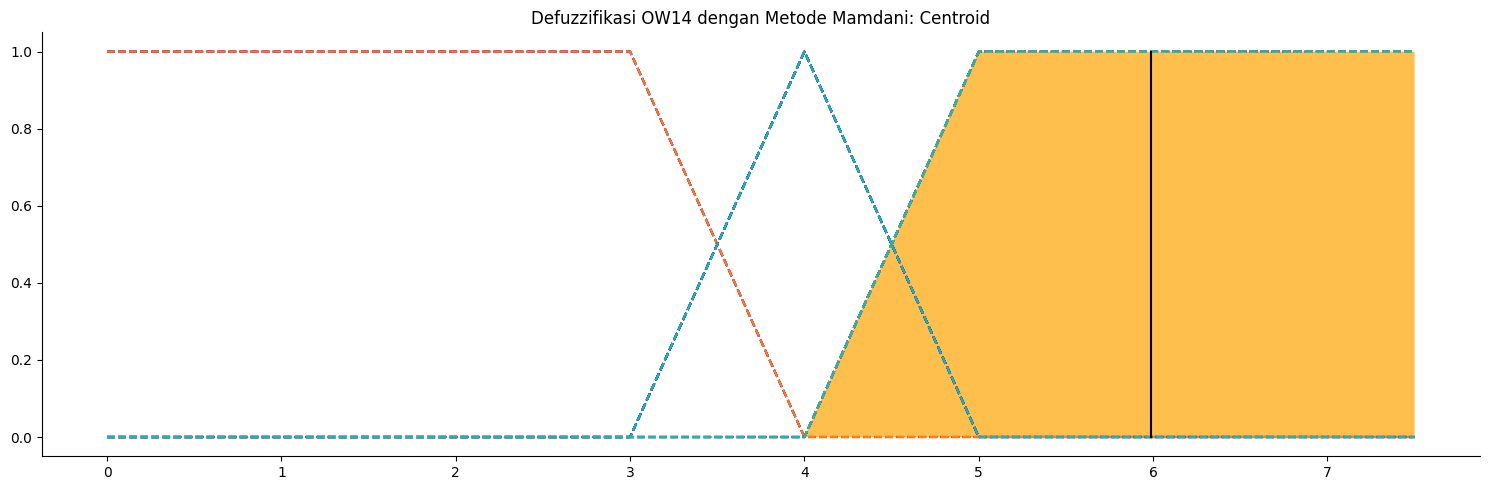

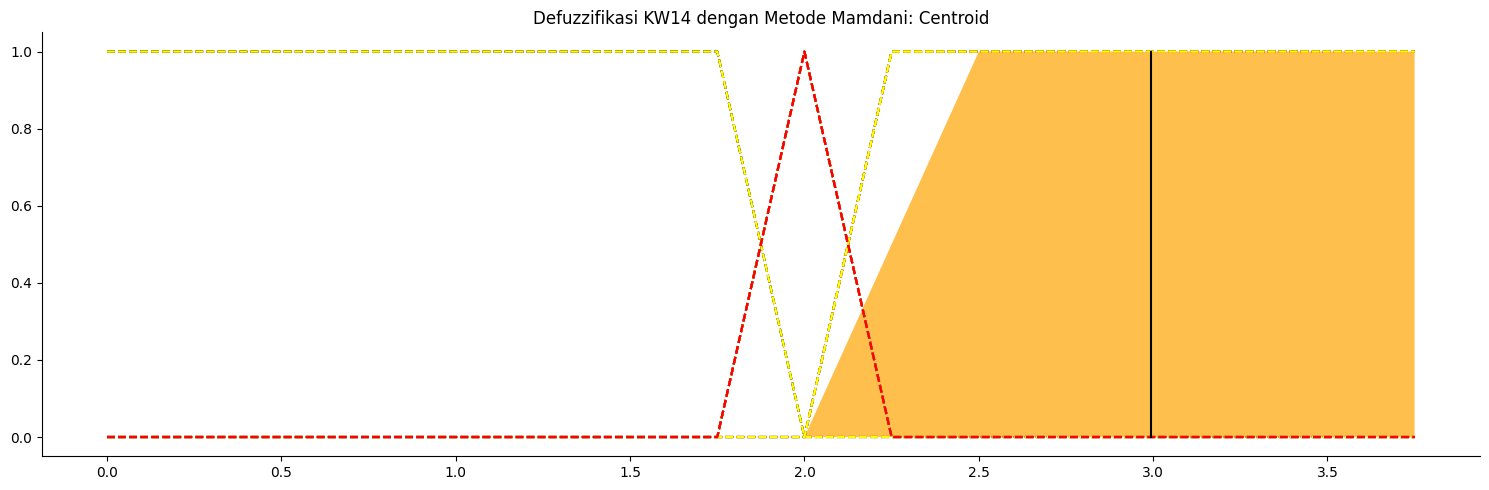

In [ ]:
# Visualization for defuzzification

#ow14
ow14_defuzz = fuzz.defuzz(OW14, aggregated_rule, 'centroid')
ow14_activation = fuzz.interp_membership(OW14, aggregated_rule, ow14_defuzz)
fig, ax0 = plt.subplots(figsize=(15,5))

ax0.plot(OW14, OW14_low, 'b', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_low, 'r', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_medium, 'b', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_medium, 'r', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_medium, 'b', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_high, 'r', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_high, 'c', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_high, 'r', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_high, 'c', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_low, 'm', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_low, 'tab:orange', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_medium, 'olive', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_medium, 'm', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_medium, 'b', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_high, 'm', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_high, 'brown', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_high, 'grey', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_high, 'm', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_medium, 'b', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_medium, 'grey', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_medium, 'c', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_high, 'm', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_high, 'm', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_high, 'tab:brown', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_high, 'b', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_high, 'yellow', linewidth=1.5, linestyle='--')
ax0.plot(OW14, OW14_high, 'c', linewidth=1.5, linestyle='--')


ax0.fill_between(OW14, ow14_arr, aggregated_rule, facecolor='Orange', alpha=0.7)

ax0.plot([ow14_defuzz, ow14_defuzz], [0, ow14_activation], 'black')
ax0.set_title('Defuzzifikasi OW14 dengan Metode Mamdani: Centroid')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()
print('GOG of OW14 :', ow14_defuzz)
print('OW14 degree of membership :', ow14_activation, '\n')

#kw14
kw14_defuzz = fuzz.defuzz(KW14, aggregated_rule, 'centroid')
kw14_activation = fuzz.interp_membership(KW14, aggregated_rule, kw14_defuzz)
fig, ax1 = plt.subplots(figsize=(15,5))

ax1.plot(KW14, KW14_high, 'b', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_high, 'r', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_medium, 'b', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_medium, 'r', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_medium, 'b', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_medium, 'r', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_low, 'r', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_low, 'y', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_low, 'r', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_high, 'aquamarine', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_high, 'tab:brown', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_medium, 'y', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_medium, 'Orange', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_high, 'grey', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_low, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_low, 'yellow', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_medium, 'y', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_high, 'Orange', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_high, 'y', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_high, 'r', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_medium, 'grey', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_high, 'y', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_high, 'yellow', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_medium, 'Orange', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_medium, 'red', linewidth=1.5, linestyle='--')
ax1.plot(KW14, KW14_medium, 'r', linewidth=1.5, linestyle='--')

ax1.fill_between(KW14, kw14_arr, aggregated_rule, facecolor='Orange', alpha=0.7)

ax1.plot([kw14_defuzz, kw14_defuzz], [0, kw14_activation], 'black')
ax1.set_title('Defuzzifikasi KW14 dengan Metode Mamdani: Centroid')

for ax in (ax1,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()
print('GOG of KW14 :', kw14_defuzz)
print('KW14 degree of membership :',kw14_activation, '\n')

# Clarification

In [ ]:
# deklarasi input variabel
X15 = np.arange(70, 110, 5) # Membuat array dengan urutan bilangan dari 70 hingga 110 dengan increment 5
X25 = np.arange(70, 110, 5)
X35 = np.arange(40, 90, 1.25)

# deklarasi output variabel
OW15 = np.arange(0, 1, 0.05) # Membuat array dengan urutan bilangan dari 0 hingga 1 dengan increment 0.05
OW25 = np.arange(0, 6, 0.5)

In [ ]:
# deklarasi membership function input
X15_low = fuzz.trapmf(X15, [70, 70, 80, 90])
X15_medium = fuzz.trimf(X15, [80, 90, 100])
X15_high = fuzz.trapmf(X15, [90, 100, 110, 110])

X25_low = fuzz.trapmf(X25, [70, 70, 80, 90])
X25_medium = fuzz.trimf(X25, [80, 90, 100])
X25_high = fuzz.trapmf(X25, [90, 100, 110, 110])

X35_low = fuzz.trapmf(X35, [40, 40, 48.75, 55])
X35_medium = fuzz.trimf(X35, [48.75, 55, 61.25])
X35_high = fuzz.trapmf(X35, [55, 61.25, 90, 90])

In [ ]:
# deklarasi membership function output
OW15_low = fuzz.trapmf(OW15, [0, 0, 0.45, 0.6])
OW15_medium = fuzz.trimf(OW15, [0.45, 0.6, 0.75])
OW15_high = fuzz.trapmf(OW15, [0.6, 0.75, 1, 1])

OW25_low = fuzz.trapmf(OW25, [0, 0, 2, 3.5])
OW25_medium = fuzz.trimf(OW25, [2, 3.5, 5])
OW25_high = fuzz.trapmf(OW25, [3.5, 5, 6, 6])

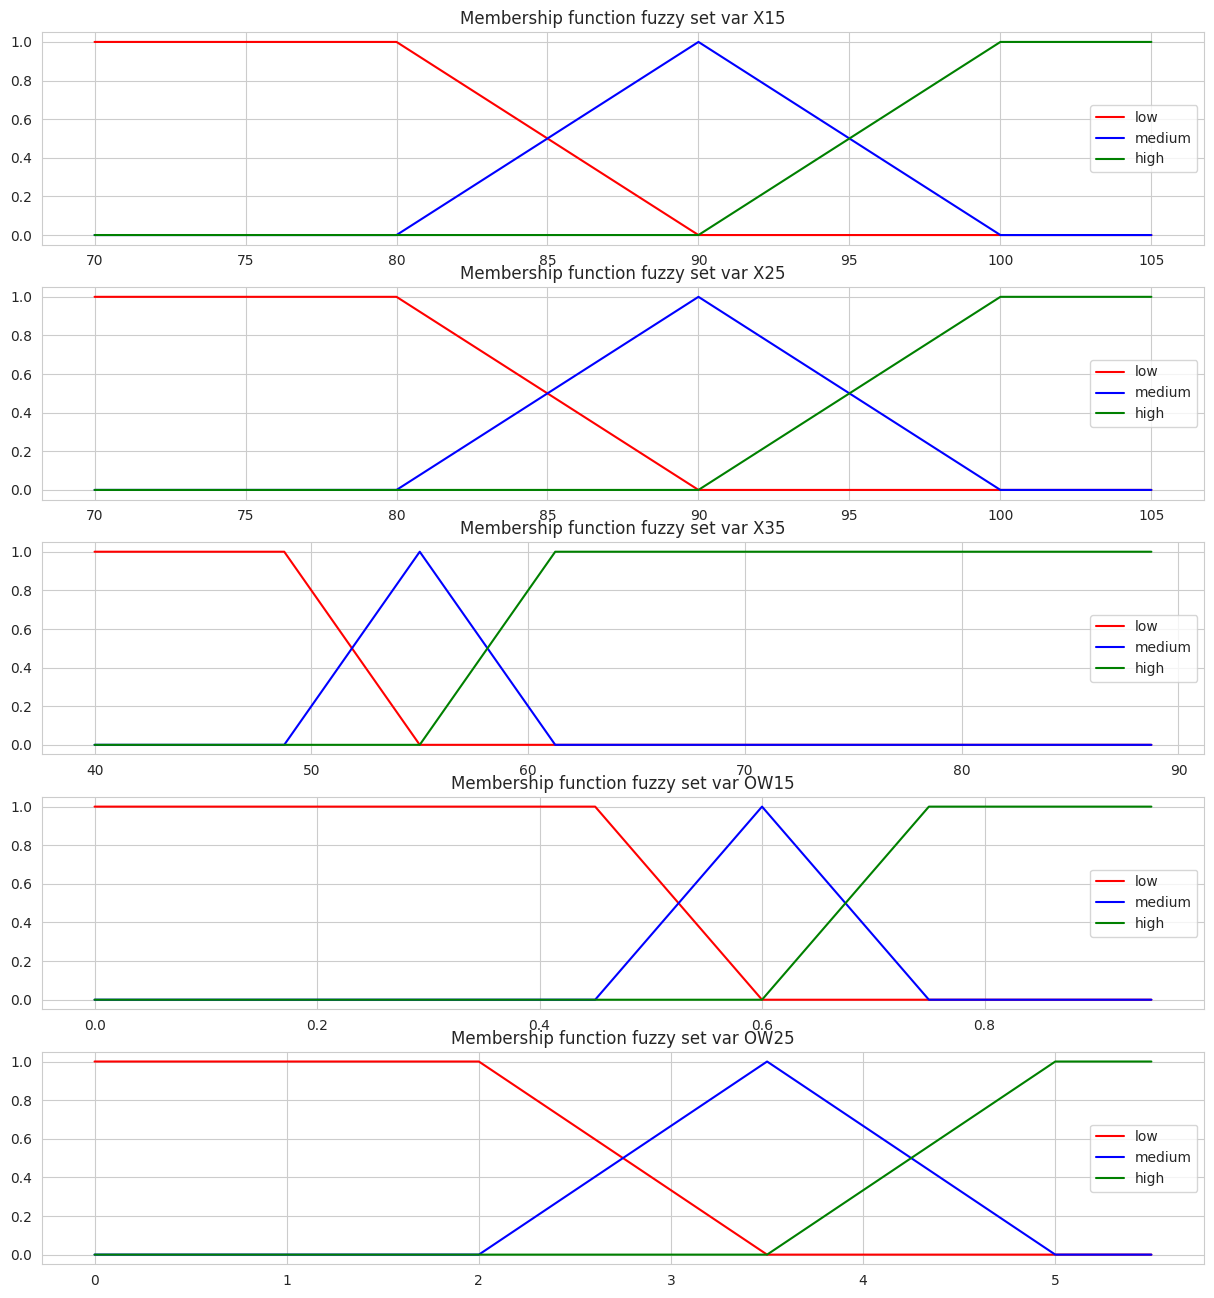

In [ ]:
# visualisasi membership function fuzzy set

# Setting the style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 16))

# Visualizing membership function fuzzy set for X15
plt.subplot(511)
sns.lineplot(x=X15, y=X15_low, color='r', linewidth=1.5, label='low')
sns.lineplot(x=X15, y=X15_medium, color='b', linewidth=1.5, label='medium')
sns.lineplot(x=X15, y=X15_high, color='g', linewidth=1.5, label='high')
plt.title('Membership function fuzzy set var X15')
plt.legend()

# Visualizing membership function fuzzy set for X25
plt.subplot(512)
sns.lineplot(x=X25, y=X25_low, color='r', linewidth=1.5, label='low')
sns.lineplot(x=X25, y=X25_medium, color='b', linewidth=1.5, label='medium')
sns.lineplot(x=X25, y=X25_high, color='g', linewidth=1.5, label='high')
plt.title('Membership function fuzzy set var X25')
plt.legend()

# Visualizing membership function fuzzy set for X35
plt.subplot(513)
sns.lineplot(x=X35, y=X35_low, color='r', linewidth=1.5, label='low')
sns.lineplot(x=X35, y=X35_medium, color='b', linewidth=1.5, label='medium')
sns.lineplot(x=X35, y=X35_high, color='g', linewidth=1.5, label='high')
plt.title('Membership function fuzzy set var X35')
plt.legend()

# Visualizing membership function fuzzy set for OW15
plt.subplot(514)
sns.lineplot(x=OW15, y=OW15_low, color='r', linewidth=1.5, label='low')
sns.lineplot(x=OW15, y=OW15_medium, color='b', linewidth=1.5, label='medium')
sns.lineplot(x=OW15, y=OW15_high, color='g', linewidth=1.5, label='high')
plt.title('Membership function fuzzy set var OW15')
plt.legend()

# Visualizing membership function fuzzy set for OW25
plt.subplot(515)
sns.lineplot(x=OW25, y=OW25_low, color='r', linewidth=1.5, label='low')
sns.lineplot(x=OW25, y=OW25_medium, color='b', linewidth=1.5, label='medium')
sns.lineplot(x=OW25, y=OW25_high, color='g', linewidth=1.5, label='high')
plt.title('Membership function fuzzy set var OW25')
plt.legend()

In [ ]:
# fuzzifikasi variabel input X15
x3 = 80

x15_lo_degree = fuzz.interp_membership(X15, X15_low, x3)
x15_md_degree = fuzz.interp_membership(X15, X15_medium, x3)
x15_hi_degree = fuzz.interp_membership(X15, X15_high, x3)

x15_fuzz_var = np.array([x15_lo_degree, x15_md_degree, x15_hi_degree])
print('Fuzzy Variable(X15 =' , x3, ') :', x15_fuzz_var)

# fuzzifikasi variabel input X25
y3 = 90

x25_lo_degree = fuzz.interp_membership(X25, X25_low, y3)
x25_md_degree = fuzz.interp_membership(X25, X25_medium, y3)
x25_hi_degree = fuzz.interp_membership(X25, X25_high, y3)

x25_fuzz_var = np.array([x25_lo_degree, x25_md_degree, x25_hi_degree])
print('Fuzzy Variable(X25 =' , y3, ') :', x25_fuzz_var)

# fuzifikasi variabel input X35
z3 = 55

x35_lo_degree = fuzz.interp_membership(X35, X35_low, z3)
x35_md_degree = fuzz.interp_membership(X35, X35_medium, z3)
x35_hi_degree = fuzz.interp_membership(X35, X35_high, z3)

x35_fuzz_var = np.array([x35_lo_degree, x35_md_degree, x35_hi_degree])
print('Fuzzy Variable(X35 =' , z3, ') :', x35_fuzz_var)

Fuzzy Variable(X15 = 80 ) : [1. 0. 0.]
Fuzzy Variable(X25 = 90 ) : [0. 1. 0.]
Fuzzy Variable(X35 = 55 ) : [0. 1. 0.]


In [ ]:
#rule based
clarification_r1 = np.fmin(x15_hi_degree, np.fmin(x25_hi_degree, x35_hi_degree))
clarification_r2 = np.fmin(x15_hi_degree, np.fmin(x25_hi_degree, x35_md_degree))
clarification_r3 = np.fmin(x15_hi_degree, np.fmin(x25_hi_degree, x35_lo_degree))
clarification_r4 = np.fmin(x15_hi_degree, np.fmin(x25_md_degree, x35_hi_degree))
clarification_r5 = np.fmin(x15_hi_degree, np.fmin(x25_md_degree, x35_md_degree))
clarification_r6 = np.fmin(x15_hi_degree, np.fmin(x25_md_degree, x35_lo_degree))
clarification_r7 = np.fmin(x15_hi_degree, np.fmin(x25_lo_degree, x35_hi_degree))
clarification_r8 = np.fmin(x15_hi_degree, np.fmin(x25_lo_degree, x35_md_degree))
clarification_r9 = np.fmin(x15_hi_degree, np.fmin(x25_lo_degree, x35_lo_degree))
clarification_r10 = np.fmin(x15_md_degree, np.fmin(x25_hi_degree, x35_hi_degree))
clarification_r11 = np.fmin(x15_md_degree, np.fmin(x25_hi_degree, x35_md_degree))
clarification_r12 = np.fmin(x15_md_degree, np.fmin(x25_hi_degree, x35_lo_degree))
clarification_r13 = np.fmin(x15_md_degree, np.fmin(x25_md_degree, x35_hi_degree))
clarification_r14 = np.fmin(x15_md_degree, np.fmin(x25_md_degree, x35_md_degree))
clarification_r15 = np.fmin(x15_md_degree, np.fmin(x25_md_degree, x35_lo_degree))
clarification_r16 = np.fmin(x15_md_degree, np.fmin(x25_lo_degree, x35_hi_degree))
clarification_r17 = np.fmin(x15_md_degree, np.fmin(x25_lo_degree, x35_md_degree))
clarification_r18 = np.fmin(x15_md_degree, np.fmin(x25_lo_degree, x35_lo_degree))
clarification_r19 = np.fmin(x15_lo_degree, np.fmin(x25_hi_degree, x35_hi_degree))
clarification_r20 = np.fmin(x15_lo_degree, np.fmin(x25_hi_degree, x35_md_degree))
clarification_r21 = np.fmin(x15_lo_degree, np.fmin(x25_hi_degree, x35_lo_degree))
clarification_r22 = np.fmin(x15_lo_degree, np.fmin(x25_md_degree, x35_hi_degree))
clarification_r23 = np.fmin(x15_lo_degree, np.fmin(x25_md_degree, x35_md_degree))
clarification_r24 = np.fmin(x15_lo_degree, np.fmin(x25_md_degree, x35_lo_degree))
clarification_r25 = np.fmin(x15_lo_degree, np.fmin(x25_lo_degree, x35_hi_degree))
clarification_r26 = np.fmin(x15_lo_degree, np.fmin(x25_lo_degree, x35_md_degree))
clarification_r27 = np.fmin(x15_lo_degree, np.fmin(x25_lo_degree, x35_lo_degree))

print('rule 1: ', clarification_r1)
print('rule 2: ', clarification_r2)
print('rule 18: ', clarification_r18)

rule 1:  0.0
rule 2:  0.0
rule 18:  0.0


In [ ]:
OW15_r1 = np.fmin(clarification_r1, OW15_high)
OW25_r1 = np.fmin(clarification_r1, OW25_high)

OW15_r2 = np.fmin(clarification_r2, OW15_low)
OW25_r2 = np.fmin(clarification_r2, OW25_low)

OW15_r3 = np.fmin(clarification_r3, OW15_high)
OW25_r3 = np.fmin(clarification_r3, OW25_low)

OW15_r4 = np.fmin(clarification_r4, OW15_high)
OW25_r4 = np.fmin(clarification_r4, OW25_high)

OW15_r5 = np.fmin(clarification_r5, OW15_low)
OW25_r5 = np.fmin(clarification_r5, OW25_low)

OW15_r6 = np.fmin(clarification_r6, OW15_high)
OW25_r6 = np.fmin(clarification_r6, OW25_low)

OW15_r7 = np.fmin(clarification_r7, OW15_high)
OW25_r7 = np.fmin(clarification_r7, OW25_high)

OW15_r8 = np.fmin(clarification_r8, OW15_medium)
OW25_r8 = np.fmin(clarification_r8, OW25_medium)

OW15_r9 = np.fmin(clarification_r9, OW15_high)
OW25_r9 = np.fmin(clarification_r9, OW25_medium)

OW15_r10 = np.fmin(clarification_r10, OW15_high)
OW25_r10 = np.fmin(clarification_r10, OW25_high)

OW15_r11 = np.fmin(clarification_r11, OW15_low)
OW25_r11 = np.fmin(clarification_r11, OW25_low)

OW15_r12 = np.fmin(clarification_r12, OW15_high)
OW25_r12 = np.fmin(clarification_r12, OW25_low)

OW15_r13 = np.fmin(clarification_r13, OW15_high)
OW25_r13 = np.fmin(clarification_r13, OW25_high)

OW15_r14 = np.fmin(clarification_r14, OW15_low)
OW25_r14 = np.fmin(clarification_r14, OW25_low)

OW15_r15 = np.fmin(clarification_r15, OW15_high)
OW25_r15 = np.fmin(clarification_r15, OW25_low)

OW15_r16 = np.fmin(clarification_r16, OW15_high)
OW25_r16 = np.fmin(clarification_r16, OW25_high)

OW15_r17 = np.fmin(clarification_r17, OW15_medium)
OW25_r17 = np.fmin(clarification_r17, OW25_medium)

OW15_r18 = np.fmin(clarification_r18, OW15_high)
OW25_r18 = np.fmin(clarification_r18, OW25_medium)

OW15_r19 = np.fmin(clarification_r19, OW15_high)
OW25_r19 = np.fmin(clarification_r19, OW25_high)

OW15_r20 = np.fmin(clarification_r20, OW15_medium)
OW25_r20 = np.fmin(clarification_r20, OW25_medium)

OW15_r21 = np.fmin(clarification_r21, OW15_high)
OW25_r21 = np.fmin(clarification_r21, OW25_medium)

OW15_r22 = np.fmin(clarification_r22, OW15_high)
OW25_r22 = np.fmin(clarification_r22, OW25_high)

OW15_r23 = np.fmin(clarification_r23, OW15_medium)
OW25_r23 = np.fmin(clarification_r23, OW25_medium)

OW15_r24 = np.fmin(clarification_r24, OW15_high)
OW25_r24 = np.fmin(clarification_r24, OW25_medium)

OW15_r25 = np.fmin(clarification_r25, OW15_high)
OW25_r25 = np.fmin(clarification_r25, OW25_high)

OW15_r26 = np.fmin(clarification_r26, OW15_high)
OW25_r26 = np.fmin(clarification_r26, OW25_high)

OW15_r27 = np.fmin(clarification_r27, OW15_high)
OW25_r27 = np.fmin(clarification_r27, OW25_high)

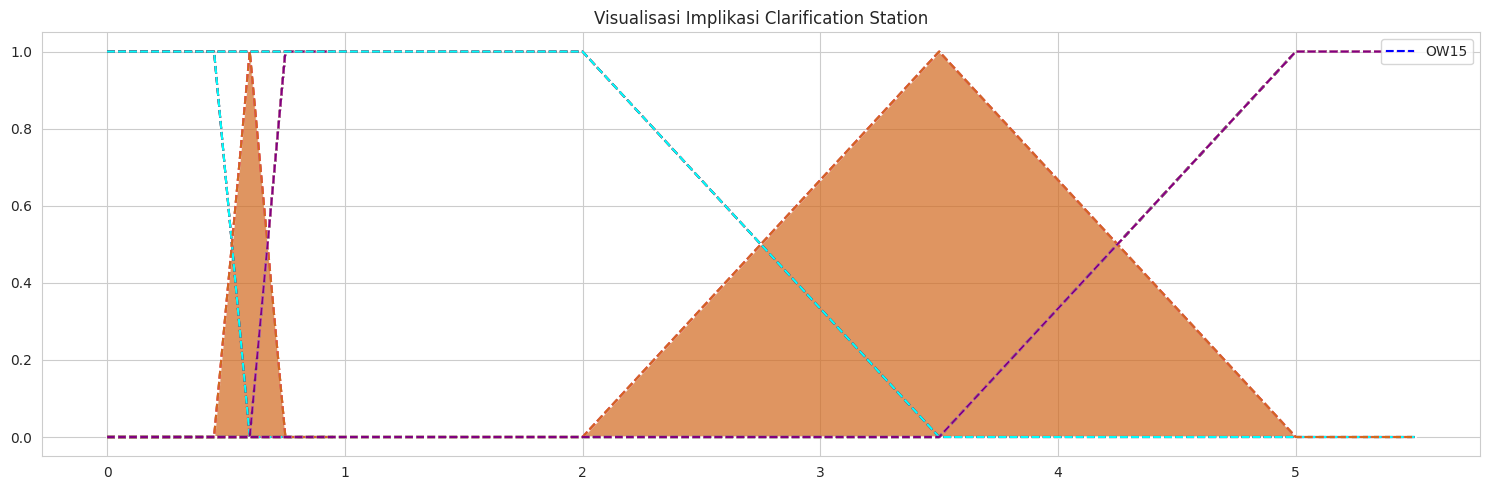

In [ ]:
#Visualisasi Implikasi Clarification Station

fig, ax = plt.subplots(figsize=(15,5))
ow15_arr = np.zeros_like(OW15)
ow25_arr = np.zeros_like(OW25)

def plot_fuzzy_area(ax, x_values, y_membership, rule_activation, color, line_label):
    """
    Fungsi untuk memplot area fuzzy dan garis membership function.

    Args:
    - ax: Axis plot dari matplotlib.
    - x_values: Array nilai x untuk plot.
    - y_membership: Array nilai membership function untuk plot.
    - rule_activation: Array nilai aktivasi dari rule fuzzy.
    - color: Warna untuk plot.
    - line_label: Label untuk garis membership function.
    """
    ax.fill_between(x_values, np.zeros_like(y_membership), rule_activation, facecolor=color, alpha=0.7)
    ax.plot(x_values, y_membership, color, linewidth=1.5, linestyle='--', label=line_label)


# Tentukan warna untuk setiap rule
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'aquamarine', 'olive', 'orange', 'purple', 'brown', 'pink', 'lime', 'cyan', 'teal', 'gray', 'gold', 'khaki', 'indigo', 'magenta', 'lightblue', 'crimson', 'chocolate', 'violet', 'wheat', 'purple']

# OW15 membership function references
OW15_mfs = [OW15_high, OW15_low, OW15_high, OW15_high, OW15_low, OW15_high, OW15_high, OW15_medium, OW15_high, OW15_high, OW15_low, OW15_high, OW15_high, OW15_low, OW15_high, OW15_high, OW15_medium, OW15_high, OW15_high, OW15_medium, OW15_high, OW15_high, OW15_medium, OW15_high, OW15_high, OW15_high, OW15_high]

# OW25 membership function references
OW25_mfs = [OW25_high, OW25_low, OW25_high, OW25_high, OW25_low, OW25_high, OW25_high, OW25_medium, OW25_high, OW25_high, OW25_low, OW25_high, OW25_high, OW25_low, OW25_high, OW25_high, OW25_medium, OW25_high, OW25_high, OW25_medium, OW25_high, OW25_high, OW25_medium, OW25_high, OW25_high, OW25_high, OW25_high]

# Plot untuk OW15
for i, color in enumerate(colors):
    rule_activation_OW15 = globals()[f'OW15_r{i+1}']
    mf_OW15 = OW15_mfs[i]
    plot_fuzzy_area(ax, OW15, mf_OW15, rule_activation_OW15, color, None if i > 0 else 'OW15')

# Plot untuk OW25
for i, color in enumerate(colors):
    rule_activation_OW25 = globals()[f'OW25_r{i+1}']
    mf_OW25 = OW25_mfs[i]
    plot_fuzzy_area(ax, OW25, mf_OW25, rule_activation_OW25, color, None)

# Menampilkan legenda
ax.legend(loc='upper right')
ax.set_title('Visualisasi Implikasi Clarification Station')

plt.tight_layout()

GOG of OW15 : 0.6
OW15 degree of membership : 0.9999999999999984 

GOG of OW25 : 3.5000000000000004
OW25 degree of membership : 0.9999999999999997 



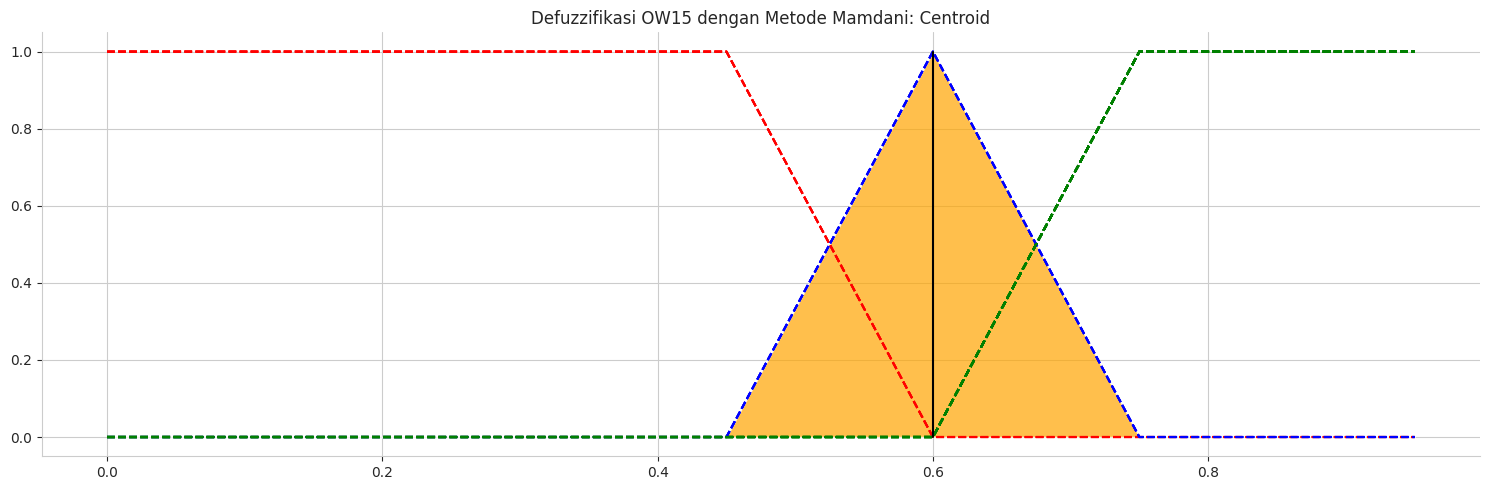

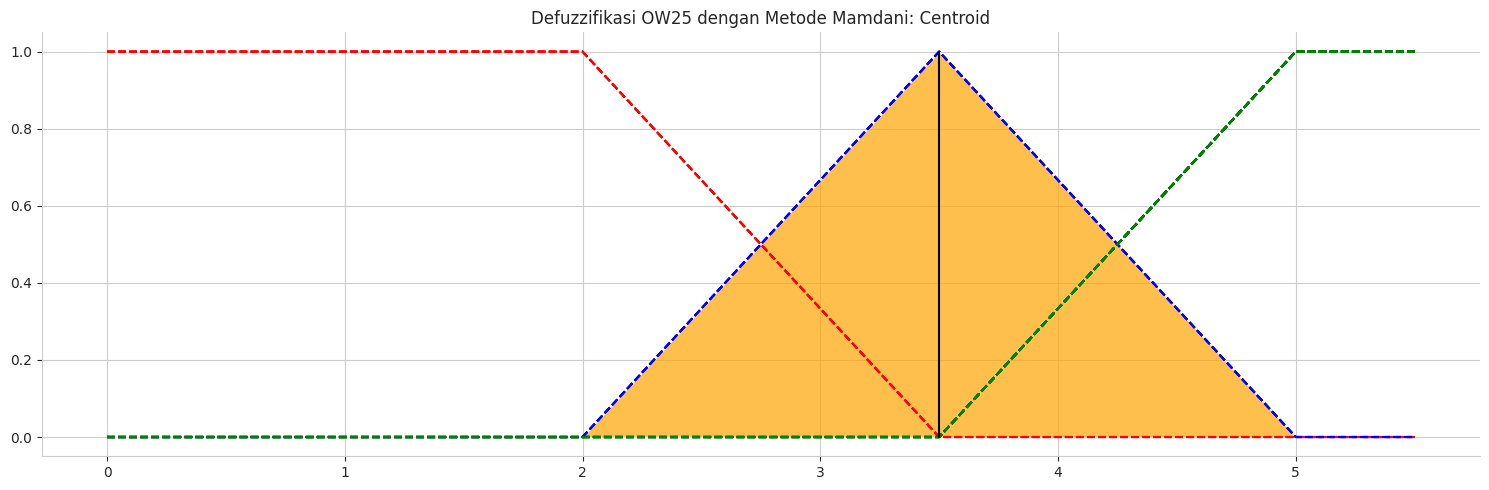

In [ ]:
# agregasi
aggregated_OW15 = np.fmax(OW15_r1, np.fmax(OW15_r2, np.fmax(OW15_r3, np.fmax(OW15_r4, np.fmax(OW15_r5, np.fmax(OW15_r6, np.fmax(OW15_r7, np.fmax(OW15_r8, np.fmax(OW15_r9, np.fmax(OW15_r10, np.fmax(OW15_r11, np.fmax(OW15_r12, np.fmax(OW15_r13, np.fmax(OW15_r14, np.fmax(OW15_r15, np.fmax(OW15_r16, np.fmax(OW15_r17, np.fmax(OW15_r18, np.fmax(OW15_r19, np.fmax(OW15_r20, np.fmax(OW15_r21, np.fmax(OW15_r22, np.fmax(OW15_r23, np.fmax(OW15_r24, np.fmax(OW15_r25, np.fmax(OW15_r26, OW15_r27))))))))))))))))))))))))))
aggregated_OW25 = np.fmax(OW25_r1, np.fmax(OW25_r2, np.fmax(OW25_r3, np.fmax(OW25_r4, np.fmax(OW25_r5, np.fmax(OW25_r6, np.fmax(OW25_r7, np.fmax(OW25_r8, np.fmax(OW25_r9, np.fmax(OW25_r10, np.fmax(OW25_r11, np.fmax(OW25_r12, np.fmax(OW25_r13, np.fmax(OW25_r14, np.fmax(OW25_r15, np.fmax(OW25_r16, np.fmax(OW25_r17, np.fmax(OW25_r18, np.fmax(OW25_r19, np.fmax(OW25_r20, np.fmax(OW25_r21, np.fmax(OW25_r22, np.fmax(OW25_r23, np.fmax(OW25_r24, np.fmax(OW25_r25, np.fmax(OW25_r26, OW25_r27))))))))))))))))))))))))))

# defuzifikasi OW15
ow15_defuzz = fuzz.defuzz(OW15, aggregated_OW15, 'centroid')
ow15_activation = fuzz.interp_membership(OW15, aggregated_OW15, ow15_defuzz)

fig, ax0 = plt.subplots(figsize=(15,5))
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_low, 'r', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_low, 'r', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_medium, 'b', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_low, 'r', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_low, 'r', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_medium, 'b', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_medium, 'b', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_medium, 'b', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(OW15, OW15_high, 'g', linewidth=1.5, linestyle='--')

ax0.fill_between(OW15, ow15_arr, aggregated_OW15, facecolor='orange', alpha=0.7)
ax0.plot([ow15_defuzz, ow15_defuzz], [0, ow15_activation], 'black')
ax0.set_title('Defuzzifikasi OW15 dengan Metode Mamdani: Centroid')
for ax in (ax0,):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
plt.tight_layout()
print('GOG of OW15 :', ow15_defuzz)
print('OW15 degree of membership :', ow15_activation, '\n')

# defuzifikasi OW25
ow25_defuzz = fuzz.defuzz(OW25, aggregated_OW25, 'centroid')
ow25_activation = fuzz.interp_membership(OW25, aggregated_OW25, ow25_defuzz)

fig, ax1 = plt.subplots(figsize=(15,5))
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_low, 'r', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_low, 'r', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_medium, 'b', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_low, 'r', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_low, 'r', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_medium, 'b', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_medium, 'b', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_medium, 'b', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(OW25, OW25_high, 'g', linewidth=1.5, linestyle='--')

ax1.fill_between(OW25, ow25_arr, aggregated_OW25, facecolor='orange', alpha=0.7)
ax1.plot([ow25_defuzz, ow25_defuzz], [0, ow25_activation], 'black')
ax1.set_title('Defuzzifikasi OW25 dengan Metode Mamdani: Centroid')
for ax in (ax1,):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
plt.tight_layout()
print('GOG of OW25 :', ow25_defuzz)
print('OW25 degree of membership :', ow25_activation, '\n')

# Kernel

In [ ]:
#Deklarasi input variables
X16 = np.arange(1200, 2600, 50)
X26 = np.arange(5, 15, 1)
X36 = np.arange(8, 20, 2)

#Deklarasi output variables
KW16 = np.arange(0, 30, 2.5)
KK6 = np.arange(0, 12, 1)

#deklarasi membership function input
X16_low = fuzz.trapmf(X16, [1200, 1200, 1650, 2000])
X16_medium = fuzz.trimf(X16, [1650, 1950, 2250])
X16_high = fuzz.trapmf(X16, [1950, 2250, 2600, 2600])

X26_low = fuzz.trapmf(X26, [5, 5, 8, 10])
X26_medium = fuzz.trimf(X26, [8, 10, 12])
X26_high = fuzz.trapmf(X26, [10, 12, 15, 15])

X36_low = fuzz.trapmf(X36, [8, 8, 12, 14])
X36_medium = fuzz.trimf(X36, [12, 14, 16])
X36_high = fuzz.trapmf(X36, [14, 16, 20, 20])

#deklarasi membership function output
KW16_low = fuzz.trapmf(KW16, [0, 0, 5, 7.5])
KW16_medium = fuzz.trimf(KW16, [5, 7.5, 10])
KW16_high = fuzz.trapmf(KW16, [7.5, 10, 30, 30])

KK6_low = fuzz.trapmf(KK6, [0, 0, 3, 6])
KK6_medium = fuzz.trimf(KK6, [3, 6, 9])
KK6_high = fuzz.trapmf(KK6, [6, 9, 12, 12])

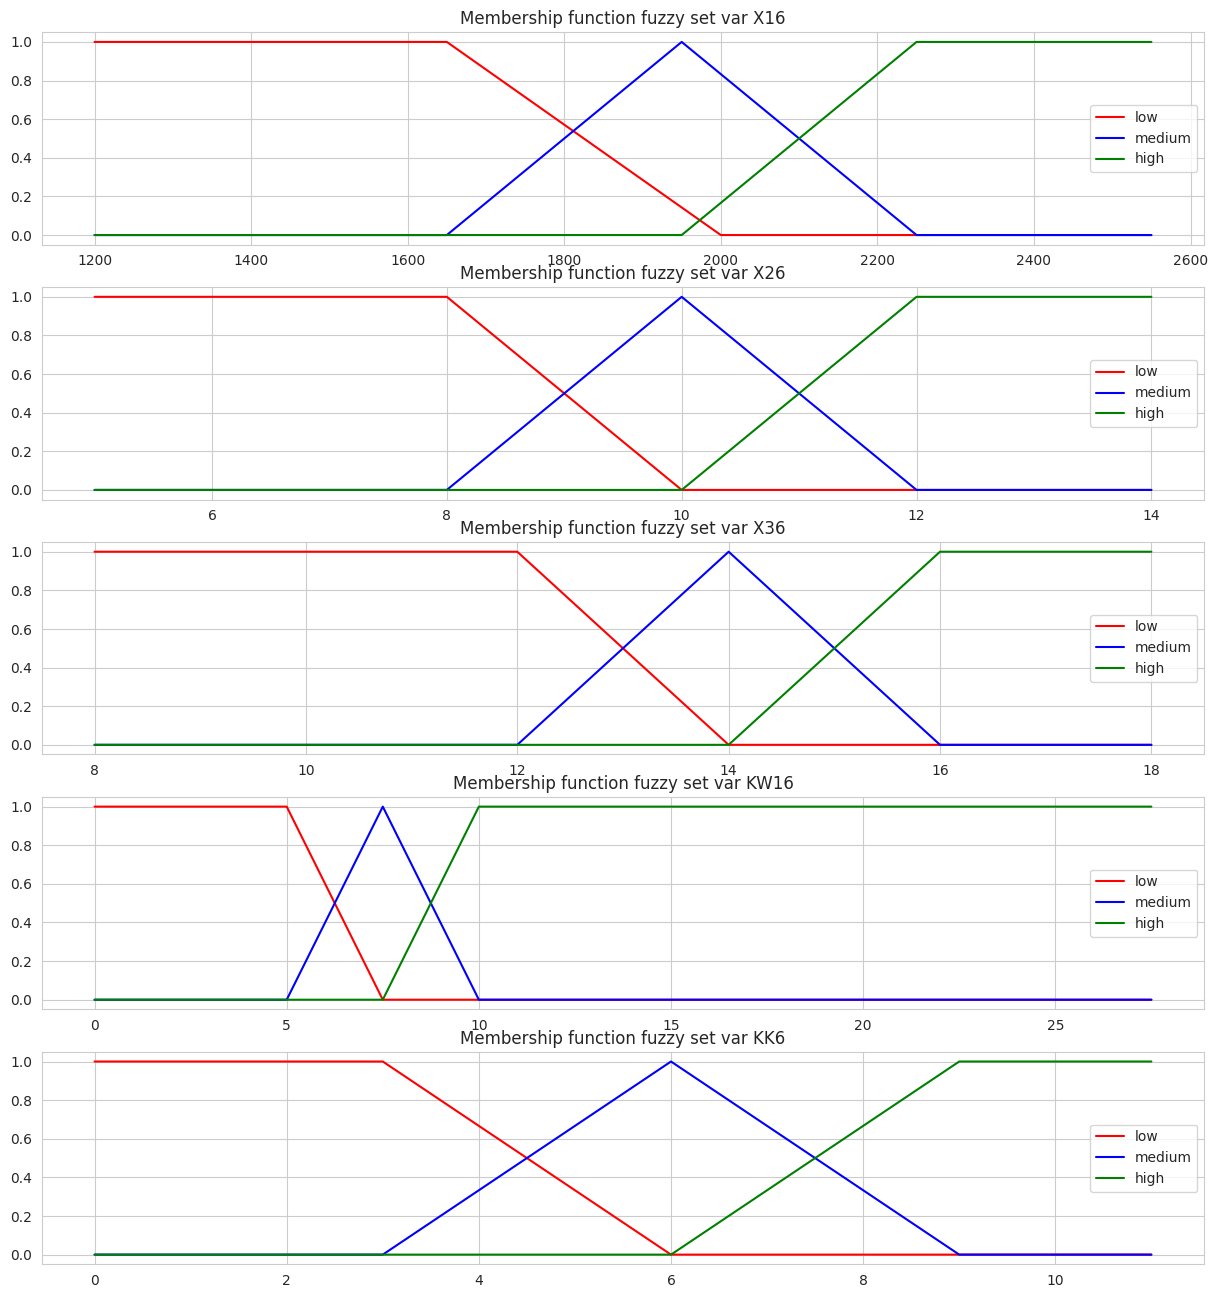

In [ ]:
#visualisasi membership function fuzzy set
fig, (dx0, dx1, dx2, dx3, dx4) = plt.subplots(nrows = 5, figsize=(15,16))

dx0.plot(X16, X16_low, 'r', linewidth=1.5, label='low')
dx0.plot(X16, X16_medium, 'b', linewidth=1.5, label='medium')
dx0.plot(X16, X16_high, 'g', linewidth=1.5, label='high')
dx0.set_title('Membership function fuzzy set var X16')
dx0.legend()

dx1.plot(X26, X26_low, 'r', linewidth=1.5, label='low')
dx1.plot(X26, X26_medium, 'b', linewidth=1.5, label='medium')
dx1.plot(X26, X26_high, 'g', linewidth=1.5, label='high')
dx1.set_title('Membership function fuzzy set var X26')
dx1.legend()

dx2.plot(X36, X36_low, 'r', linewidth=1.5, label='low')
dx2.plot(X36, X36_medium, 'b', linewidth=1.5, label='medium')
dx2.plot(X36, X36_high, 'g', linewidth=1.5, label='high')
dx2.set_title('Membership function fuzzy set var X36')
dx2.legend()

dx3.plot(KW16, KW16_low, 'r', linewidth=1.5, label='low')
dx3.plot(KW16, KW16_medium, 'b', linewidth=1.5, label='medium')
dx3.plot(KW16, KW16_high, 'g', linewidth=1.5, label='high')
dx3.set_title('Membership function fuzzy set var KW16')
dx3.legend()

dx4.plot(KK6, KK6_low, 'r', linewidth=1.5, label='low')
dx4.plot(KK6, KK6_medium, 'b', linewidth=1.5, label='medium')
dx4.plot(KK6, KK6_high, 'g', linewidth=1.5, label='high')
dx4.set_title('Membership function fuzzy set var KK6')
dx4.legend()

In [ ]:
#fuzzifikasi variabel input X16
x4 = 1650

x16_lo_degree = fuzz.interp_membership(X16, X16_low, x4)
x16_md_degree = fuzz.interp_membership(X16, X16_medium, x4)
x16_hi_degree = fuzz.interp_membership(X16, X16_high, x4)

x16_fuzz_var = np.array([x16_lo_degree, x16_md_degree, x16_hi_degree])
print('Fuzzy Variable(X16 =' , x4, ') :', x16_fuzz_var)

#fuzzifikasi variabel input X26
y4 = 10

x26_lo_degree = fuzz.interp_membership(X26, X26_low, y4)
x26_md_degree = fuzz.interp_membership(X26, X26_medium, y4)
x26_hi_degree = fuzz.interp_membership(X26, X26_high, y4)

x26_fuzz_var = np.array([x26_lo_degree, x26_md_degree, x26_hi_degree])
print('Fuzzy Variable(X26 =' , y4, ') :', x26_fuzz_var)

#fuzifikasi variabel input X36
z4 = 14

x36_lo_degree = fuzz.interp_membership(X36, X36_low, z4)
x36_md_degree = fuzz.interp_membership(X36, X36_medium, z4)
x36_hi_degree = fuzz.interp_membership(X36, X36_high, z4)

x36_fuzz_var = np.array([x36_lo_degree, x36_md_degree, x36_hi_degree])
print('Fuzzy Variable(X36 =' , z4, ') :', x36_fuzz_var)

Fuzzy Variable(X16 = 1650 ) : [1. 0. 0.]
Fuzzy Variable(X26 = 10 ) : [0. 1. 0.]
Fuzzy Variable(X36 = 14 ) : [0. 1. 0.]


In [ ]:
#rule based
kernel_r1 = np.fmin(x16_hi_degree, np.fmin(x26_hi_degree, x36_hi_degree))
kernel_r2 = np.fmin(x16_hi_degree, np.fmin(x26_hi_degree, x36_md_degree))
kernel_r3 = np.fmin(x16_hi_degree, np.fmin(x26_hi_degree, x36_lo_degree))
kernel_r4 = np.fmin(x16_hi_degree, np.fmin(x26_md_degree, x36_hi_degree))
kernel_r5 = np.fmin(x16_hi_degree, np.fmin(x26_md_degree, x36_md_degree))
kernel_r6 = np.fmin(x16_hi_degree, np.fmin(x26_md_degree, x36_lo_degree))
kernel_r7 = np.fmin(x16_hi_degree, np.fmin(x26_lo_degree, x36_hi_degree))
kernel_r8 = np.fmin(x16_hi_degree, np.fmin(x26_lo_degree, x36_md_degree))
kernel_r9 = np.fmin(x16_hi_degree, np.fmin(x26_lo_degree, x36_lo_degree))
kernel_r10 = np.fmin(x16_md_degree, np.fmin(x26_hi_degree, x36_hi_degree))
kernel_r11 = np.fmin(x16_md_degree, np.fmin(x26_hi_degree, x36_md_degree))
kernel_r12 = np.fmin(x16_md_degree, np.fmin(x26_hi_degree, x36_lo_degree))
kernel_r13 = np.fmin(x16_md_degree, np.fmin(x26_md_degree, x36_hi_degree))
kernel_r14 = np.fmin(x16_md_degree, np.fmin(x26_md_degree, x36_md_degree))
kernel_r15 = np.fmin(x16_md_degree, np.fmin(x26_md_degree, x36_lo_degree))
kernel_r16 = np.fmin(x16_md_degree, np.fmin(x26_lo_degree, x36_hi_degree))
kernel_r17 = np.fmin(x16_md_degree, np.fmin(x26_lo_degree, x36_md_degree))
kernel_r18 = np.fmin(x16_md_degree, np.fmin(x26_lo_degree, x36_lo_degree))
kernel_r19 = np.fmin(x16_lo_degree, np.fmin(x26_hi_degree, x36_hi_degree))
kernel_r20 = np.fmin(x16_lo_degree, np.fmin(x26_hi_degree, x36_md_degree))
kernel_r21 = np.fmin(x16_lo_degree, np.fmin(x26_hi_degree, x36_lo_degree))
kernel_r22 = np.fmin(x16_lo_degree, np.fmin(x26_md_degree, x36_hi_degree))
kernel_r23 = np.fmin(x16_lo_degree, np.fmin(x26_md_degree, x36_md_degree))
kernel_r24 = np.fmin(x16_lo_degree, np.fmin(x26_md_degree, x36_lo_degree))
kernel_r25 = np.fmin(x16_lo_degree, np.fmin(x26_lo_degree, x36_hi_degree))
kernel_r26 = np.fmin(x16_lo_degree, np.fmin(x26_lo_degree, x36_md_degree))
kernel_r27 = np.fmin(x16_lo_degree, np.fmin(x26_lo_degree, x36_lo_degree))

print('rule 1: ', kernel_r1)
print('rule 2: ', kernel_r2)
print('rule 18: ', kernel_r18)

KW16_r1 = np.fmin(kernel_r1, KW16_high)
KK6_r1 = np.fmin(kernel_r1, KK6_low)

KW16_r2 = np.fmin(kernel_r2, KW16_high)
KK6_r2 = np.fmin(kernel_r2, KK6_low)

KW16_r3 = np.fmin(kernel_r3, KW16_high)
KK6_r3 = np.fmin(kernel_r3, KK6_medium)

KW16_r4 = np.fmin(kernel_r4, KW16_high)
KK6_r4 = np.fmin(kernel_r4, KK6_low)

KW16_r5 = np.fmin(kernel_r5, KW16_high)
KK6_r5 = np.fmin(kernel_r5, KK6_medium)

KW16_r6 = np.fmin(kernel_r6, KW16_high)
KK6_r6 = np.fmin(kernel_r6, KK6_low)

KW16_r7 = np.fmin(kernel_r7, KW16_high)
KK6_r7 = np.fmin(kernel_r7, KK6_low)

KW16_r8 = np.fmin(kernel_r8, KW16_medium)
KK6_r8 = np.fmin(kernel_r8, KK6_high)

KW16_r9 = np.fmin(kernel_r9, KW16_low)
KK6_r9 = np.fmin(kernel_r9, KK6_high)

KW16_r10 = np.fmin(kernel_r10, KW16_high)
KK6_r10 = np.fmin(kernel_r10, KK6_low)

KW16_r11 = np.fmin(kernel_r11, KW16_high)
KK6_r11 = np.fmin(kernel_r11, KK6_low)

KW16_r12 = np.fmin(kernel_r12, KW16_high)
KK6_r12 = np.fmin(kernel_r12, KK6_high)

KW16_r13 = np.fmin(kernel_r13, KW16_high)
KK6_r13 = np.fmin(kernel_r13, KK6_low)

KW16_r14 = np.fmin(kernel_r14, KW16_low)
KK6_r14 = np.fmin(kernel_r14, KK6_low)

KW16_r15 = np.fmin(kernel_r15, KW16_low)
KK6_r15 = np.fmin(kernel_r15, KK6_high)

KW16_r16 = np.fmin(kernel_r16, KW16_high)
KK6_r16 = np.fmin(kernel_r16, KK6_medium)

KW16_r17 = np.fmin(kernel_r17, KW16_low)
KK6_r17 = np.fmin(kernel_r17, KK6_high)

KW16_r18 = np.fmin(kernel_r18, KW16_low)
KK6_r18 = np.fmin(kernel_r18, KK6_high)

KW16_r19 = np.fmin(kernel_r19, KW16_high)
KK6_r19 = np.fmin(kernel_r19, KK6_low)

KW16_r20 = np.fmin(kernel_r20, KW16_high)
KK6_r20 = np.fmin(kernel_r20, KK6_medium)

KW16_r21 = np.fmin(kernel_r21, KW16_high)
KK6_r21 = np.fmin(kernel_r21, KK6_high)

KW16_r22 = np.fmin(kernel_r22, KW16_high)
KK6_r22 = np.fmin(kernel_r22, KK6_medium)

KW16_r23 = np.fmin(kernel_r23, KW16_high)
KK6_r23 = np.fmin(kernel_r23, KK6_medium)

KW16_r24 = np.fmin(kernel_r24, KW16_high)
KK6_r24 = np.fmin(kernel_r24, KK6_medium)

KW16_r25 = np.fmin(kernel_r25, KW16_high)
KK6_r25 = np.fmin(kernel_r25, KK6_medium)

KW16_r26 = np.fmin(kernel_r26, KW16_high)
KK6_r26 = np.fmin(kernel_r26, KK6_high)

KW16_r27 = np.fmin(kernel_r27, KW16_high)
KK6_r27 = np.fmin(kernel_r27, KK6_high)


rule 1:  0.0
rule 2:  0.0
rule 18:  0.0


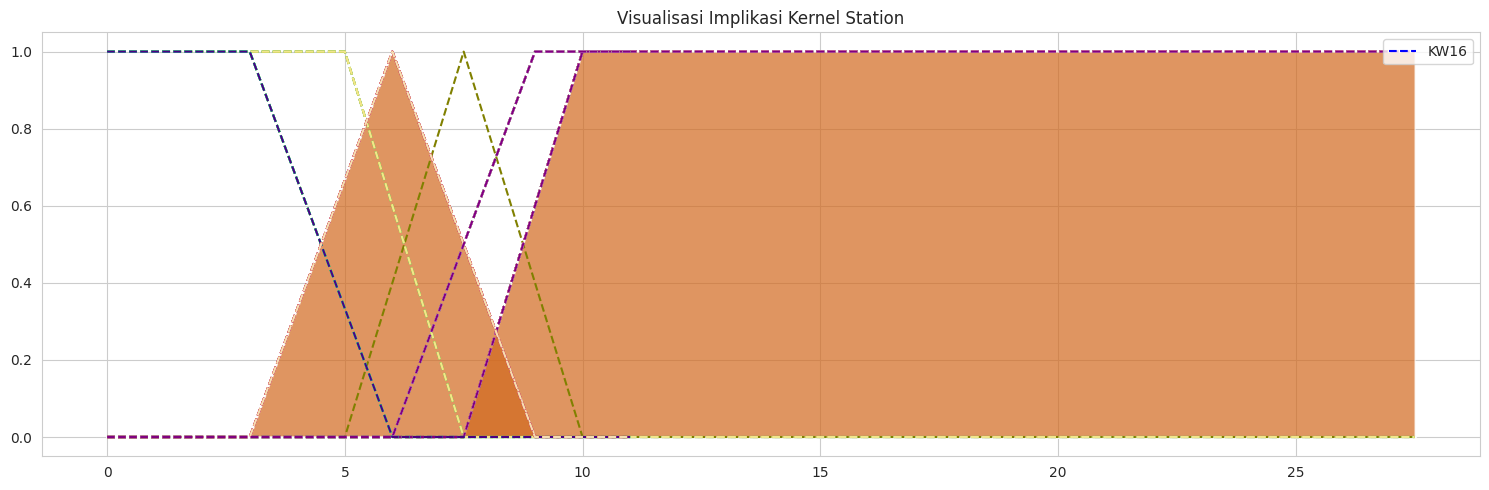

In [ ]:
#Visualisasi Implikasi Kernel Station

fig, ax = plt.subplots(figsize=(15,5))
kw16_arr = np.zeros_like(KW16)
kk6_arr = np.zeros_like(KK6)

def plot_fuzzy_area(ax, x_values, y_membership, rule_activation, color, line_label):
    """
    Fungsi untuk memplot area fuzzy dan garis membership function.

    Args:
    - ax: Axis plot dari matplotlib.
    - x_values: Array nilai x untuk plot.
    - y_membership: Array nilai membership function untuk plot.
    - rule_activation: Array nilai aktivasi dari rule fuzzy.
    - color: Warna untuk plot.
    - line_label: Label untuk garis membership function.
    """
    ax.fill_between(x_values, np.zeros_like(y_membership), rule_activation, facecolor=color, alpha=0.7)
    ax.plot(x_values, y_membership, color, linewidth=1.5, linestyle='--', label=line_label)


# Tentukan warna untuk setiap rule
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'aquamarine', 'olive', 'orange', 'purple', 'brown', 'pink', 'lime', 'cyan', 'teal', 'gray', 'gold', 'khaki', 'indigo', 'magenta', 'lightblue', 'crimson', 'chocolate', 'violet', 'wheat', 'purple']

# KW16 membership function references
KW16_mfs = [KW16_high, KW16_high, KW16_high, KW16_high, KW16_high, KW16_high, KW16_high, KW16_medium, KW16_low, KW16_high, KW16_high, KW16_high, KW16_high, KW16_low, KW16_low, KW16_high, KW16_low, KW16_low, KW16_high, KW16_high, KW16_high, KW16_high, KW16_high, KW16_high, KW16_high, KW16_high, KW16_high]

# KK6 membership function references
KK6_mfs = [KK6_high, KK6_high, KK6_medium, KK6_low, KK6_medium, KK6_low, KK6_low, KK6_medium, KK6_low, KK6_high, KK6_high, KK6_high, KK6_low, KK6_low, KK6_high, KK6_medium, KK6_high, KK6_high, KK6_low, KK6_medium, KK6_high, KK6_medium, KK6_medium, KK6_high, KK6_medium, KK6_high, KK6_high]

# Plot untuk KW16
for i, color in enumerate(colors):
    rule_activation_KW16 = globals()[f'KW16_r{i+1}']
    mf_KW16 = KW16_mfs[i]
    plot_fuzzy_area(ax, KW16, mf_KW16, rule_activation_KW16, color, None if i > 0 else 'KW16')

# Plot untuk KK6
for i, color in enumerate(colors):
    rule_activation_KK6 = globals()[f'KK6_r{i+1}']
    mf_KK6 = KK6_mfs[i]
    plot_fuzzy_area(ax, KK6, mf_KK6, rule_activation_KK6, color, None)

# Menampilkan legenda
ax.legend(loc='upper right')
ax.set_title('Visualisasi Implikasi Kernel Station')

plt.tight_layout()

GOG of KW16: 18.11111111111111
KW16 degree of membership: 1.0 

GOG of KK6: 6.000000000000001
KK6 degree of membership: 0.9999999999999997 



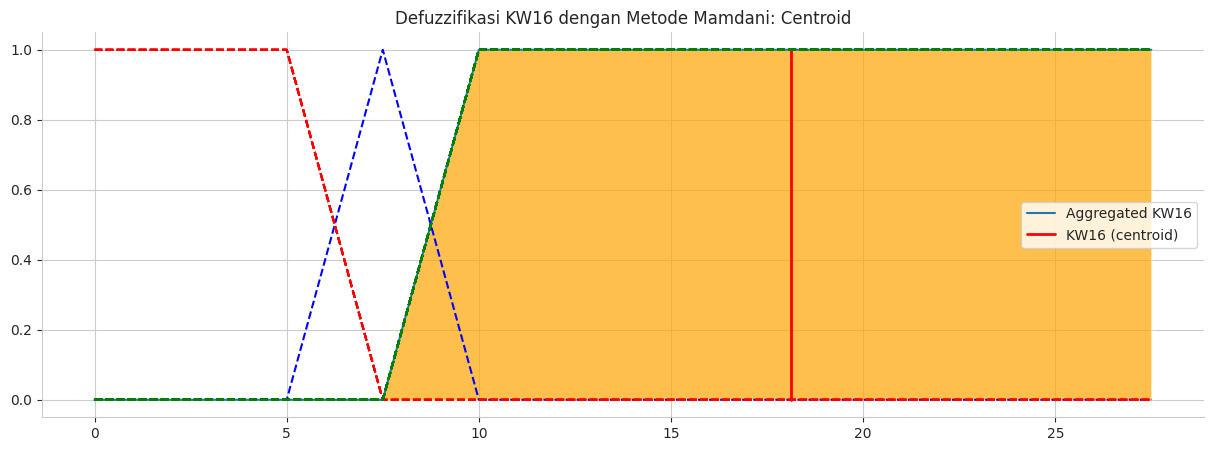

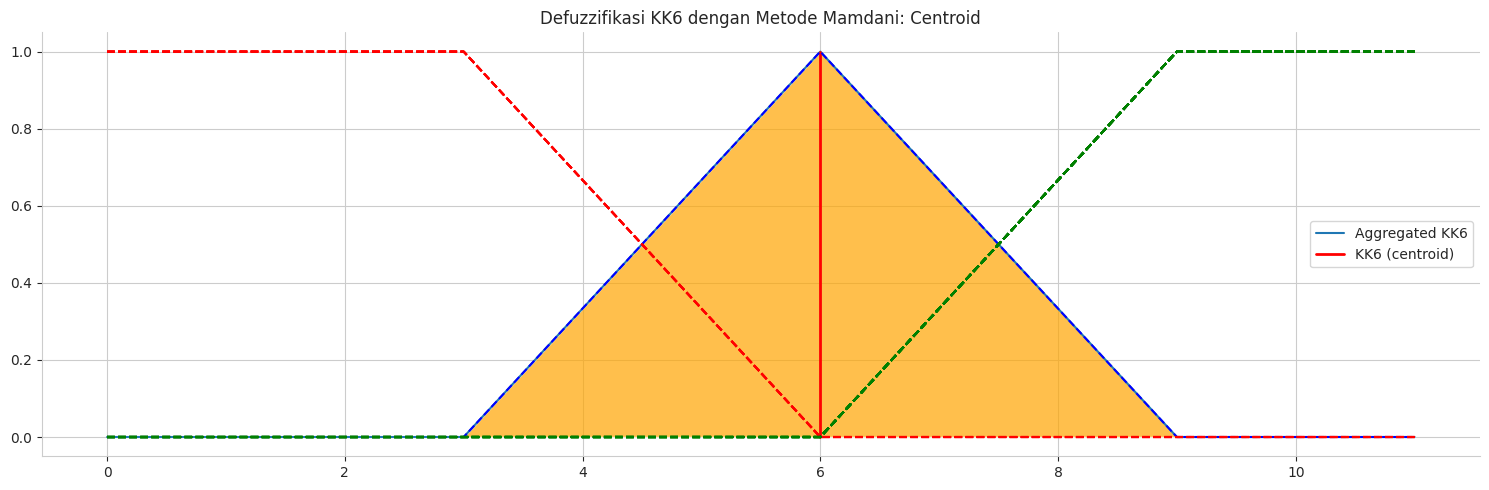

In [ ]:
def aggregate(rules):
    """
    Fungsi untuk mengagregasi semua rule activations.

    Args:
    - rules: List dari semua rule activations.

    Returns:
    - aggregated_values: Nilai agregasi dari semua rule activations.
    """
    aggregated_values = np.fmax(rules[0], rules[1])
    for rule in rules[2:]:
        aggregated_values = np.fmax(aggregated_values, rule)
    return aggregated_values

def defuzzify_and_visualize(ax, x_values, aggregated_values, var_name='Variable'):
    """
    Fungsi untuk melakukan defuzzifikasi dan visualisasi hasilnya.

    Args:
    - ax: Axis plot dari matplotlib untuk melakukan plot.
    - x_values: Array nilai x untuk plot.
    - aggregated_values: Nilai agregasi dari output fuzzy set.
    - var_name: Nama variabel yang sedang diproses (untuk judul plot).
    """
    defuzz_value = fuzz.defuzz(x_values, aggregated_values, 'centroid')
    activation = fuzz.interp_membership(x_values, aggregated_values, defuzz_value)

    # Visualisasi
    ax.plot(x_values, aggregated_values, linewidth=1.5, label=f'Aggregated {var_name}')
    ax.fill_between(x_values, np.zeros_like(aggregated_values), aggregated_values, facecolor='orange', alpha=0.7)
    ax.plot([defuzz_value, defuzz_value], [0, activation], 'r', linewidth=2, label=f'{var_name} (centroid)')
    ax.set_title(f'Defuzzifikasi {var_name} dengan Metode Mamdani: Centroid')
    ax.legend()

    # Menghilangkan spines yang tidak perlu
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    print(f'GOG of {var_name}:', defuzz_value)
    print(f'{var_name} degree of membership:', activation, '\n')

# Contoh penggunaan fungsi agregasi
aggregated_KW16 = aggregate([KW16_r1, KW16_r2, KW16_r3, KW16_r4, KW16_r5, KW16_r6, KW16_r7, KW16_r8, KW16_r9, KW16_r10, KW16_r11, KW16_r12, KW16_r13, KW16_r14, KW16_r15, KW16_r16, KW16_r17, KW16_r18, KW16_r19, KW16_r20, KW16_r21, KW16_r22, KW16_r23, KW16_r24, KW16_r25, KW16_r26, KW16_r27])
aggregated_KK6 = aggregate([KK6_r1, KK6_r2, KK6_r3, KK6_r4, KK6_r5, KK6_r6, KK6_r7, KK6_r8, KK6_r9, KK6_r10, KK6_r11, KK6_r12, KK6_r13, KK6_r14, KK6_r15, KK6_r16, KK6_r17, KK6_r18, KK6_r19, KK6_r20, KK6_r21, KK6_r22, KK6_r23, KK6_r24, KK6_r25, KK6_r26, KK6_r27])

# Contoh penggunaan fungsi defuzzifikasi dan visualisasi
fig, ax0 = plt.subplots(figsize=(15,5))
defuzzify_and_visualize(ax0, KW16, aggregated_KW16, 'KW16')

ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_medium, 'b', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_low, 'r', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_low, 'r', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_low, 'r', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_low, 'r', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_low, 'r', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')
ax0.plot(KW16, KW16_high, 'g', linewidth=1.5, linestyle='--')

fig, ax1 = plt.subplots(figsize=(15,5))
defuzzify_and_visualize(ax1, KK6, aggregated_KK6, 'KK6')

ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_medium, 'b', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_low, 'r', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_low, 'r', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_low, 'r', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_low, 'r', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_low, 'r', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')
ax1.plot(KK6, KK6_high, 'g', linewidth=1.5, linestyle='--')

plt.tight_layout()